<a href="https://colab.research.google.com/github/moze90/Thesis2022/blob/main/Thesis_2022_Newdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from glob import glob
import re
import gc
import csv
from scipy.stats import zscore
from datetime import datetime
from pandas.io.parsers.readers import read_csv
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATA PREPROCESSING**

# **new EQ**

**First step:removing null values**

In [ ]:
df1=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/eq.csv")

In [ ]:
 data1= pd.read_csv(df1,sep=';',header=0,parse_dates=True)

In [ ]:
data1.head(1)

,InvNr,InkDat,Skrotad,flReplacementCost,flPurchaseCost,SkrotDatum,ID,PMLMaintenanceRequirementID,PMLMissionCriticalID,PMLRiscID,...,Modell,Handelsnamn,intRisktal,strRiscName,intRiscSeverityLevel,FUSenaste,FUIntNasta,PMLMaintenanceRequirementDescription,PMLMissionCriticalDescription,PMLRiscDescription
0,C951-01,2001-01-01 00:00:00.000,2,0,33210,NaN,68263,NaN,NaN,NaN,...,Wolf 5512,NaN,20.0,20,20.0,2004-06-15 00:00:00.000,NaN,NaN,NaN,NaN


In [ ]:
data1.isnull().sum()

InvNr                                     2344
InkDat                                   13883
Skrotad                                      0
flReplacementCost                        65477
flPurchaseCost                            6997
SkrotDatum                              129351
ID                                           0
PMLMaintenanceRequirementID             226918
PMLMissionCriticalID                    226943
PMLRiscID                               226946
Benamn                                    2025
Fabrikat                                  2099
Modell                                    2150
Handelsnamn                             224409
intRisktal                                9497
strRiscName                               9497
intRiscSeverityLevel                      9497
FUSenaste                               146508
FUIntNasta                              178383
PMLMaintenanceRequirementDescription    226918
PMLMissionCriticalDescription           226943
PMLRiscDescri

In [ ]:
fin=data1.drop(columns=['intRiscSeverityLevel','Skrotad','flReplacementCost','flPurchaseCost','PMLMaintenanceRequirementID','PMLMissionCriticalID','PMLRiscID','strRiscName','Handelsnamn','PMLMaintenanceRequirementDescription','PMLMissionCriticalDescription','PMLRiscDescription','FUSenaste','FUIntNasta'])

In [ ]:
fin.head(4)

,InvNr,InkDat,SkrotDatum,ID,Benamn,Fabrikat,Modell,intRisktal
0,C951-01,2001-01-01 00:00:00.000,NaN,68263,Endoskop,Wolf,Wolf 5512,20.0
1,C951-02,2001-02-08 00:00:00.000,2018-12-19 00:00:00.000,68264,Endoskop,Wolf,Wolf 5512,31.0
2,111444,2005-01-01 00:00:00.000,NaN,86743,Endoskop,Wolf,Wolf 5512,20.0
3,9013559,2008-01-01 00:00:00.000,NaN,140398,Ljuskälla f endoskop,Wolf,4015,13.0


In [ ]:
dict = {'FUSenaste': 'prevPm',
        'FUIntNasta': 'nexPm',
        'InkDat':'Equip.reg_date',
        'SkrotDatum':'Scrapped_date',
        'Benamn':'dev',
      'Fabrikat':'Brand',
        'Modell':'Model',
        'intRisktal':'calc.Risk'}

In [ ]:
fin.rename(columns=dict,inplace=True)

In [ ]:
len(fin)

227003

**substitute scrapped null values with data collection**

In [ ]:
fin.isnull().sum()

InvNr               2344
Equip.reg_date     13883
Scrapped_date     129351
ID                     0
dev                 2025
Brand               2099
Model               2150
calc.Risk           9497
dtype: int64

In [ ]:
dict1 = {'InkDat': 'Equip.reg_date',
        'SkrotDatum': 'Scrapped_date',
        'Benamn':'dev',
        'Fabrikat':'Brand',
        'Modell':'Model',
        'intRisktal':'cal.Risk'}

In [ ]:
fin.head(3)

,InvNr,Equip.reg_date,Scrapped_date,ID,dev,Brand,Model,calc.Risk
0,C951-01,2001-01-01 00:00:00.000,NaN,68263,Endoskop,Wolf,Wolf 5512,20.0
1,C951-02,2001-02-08 00:00:00.000,2018-12-19 00:00:00.000,68264,Endoskop,Wolf,Wolf 5512,31.0
2,111444,2005-01-01 00:00:00.000,NaN,86743,Endoskop,Wolf,Wolf 5512,20.0


In [ ]:
fin.dropna(inplace=True)

In [ ]:
fin.shape

(83584, 8)

In [ ]:
fin.set_index('ID',inplace=True,drop=False)

In [ ]:
fin.head(3)

,InvNr,Equip.reg_date,Scrapped_date,ID,dev,Brand,Model,calc.Risk
ID,,,,,,,,
68264,C951-02,2001-02-08 00:00:00.000,2018-12-19 00:00:00.000,68264,Endoskop,Wolf,Wolf 5512,31.0
112347,P384,1981-01-01 00:00:00.000,2012-07-19 00:00:00.000,112347,Ljuskälla f endoskop,Wolf,4015,31.0
88325,C0297,1985-01-01 00:00:00.000,2015-12-16 00:00:00.000,88325,Ljuskälla f endoskop,Wolf,4015,31.0


# ***pm***

In [ ]:
df3=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/pm.csv")

In [ ]:
fin3=read_csv(df3,sep=';')

In [ ]:
fin3.head(3)

,Id,EquipmentId,NextPM,LastPM,Interval,IsRecurring
0,7838,17635.0,2007-01-01 00:00:00.000,2006-01-12 00:00:00.000,12 Månader,1
1,27837,65129.0,2003-06-15 00:00:00.000,2001-06-15 00:00:00.000,24 Månader,1
2,27838,65130.0,2007-07-01 00:00:00.000,2005-07-25 00:00:00.000,24 Månader,1


In [ ]:
fin3.isnull().sum()

Id                 0
EquipmentId     4081
NextPM          4921
LastPM         47521
Interval       13329
IsRecurring        0
dtype: int64

In [ ]:
len(fin3)

117291

In [ ]:
fin3.dropna(inplace=True)

In [ ]:
len(fin3)

68762

In [ ]:
fin3.isnull().sum()

Id             0
EquipmentId    0
NextPM         0
LastPM         0
Interval       0
IsRecurring    0
dtype: int64

In [ ]:
fin3.count()

Id             68762
EquipmentId    68762
NextPM         68762
LastPM         68762
Interval       68762
IsRecurring    68762
dtype: int64

In [ ]:
fin3.set_index('EquipmentId',drop=False)

,Id,EquipmentId,NextPM,LastPM,Interval,IsRecurring
EquipmentId,,,,,,
17635.0,7838,17635.0,2007-01-01 00:00:00.000,2006-01-12 00:00:00.000,12 Månader,1
65129.0,27837,65129.0,2003-06-15 00:00:00.000,2001-06-15 00:00:00.000,24 Månader,1
65130.0,27838,65130.0,2007-07-01 00:00:00.000,2005-07-25 00:00:00.000,24 Månader,1
65131.0,27839,65131.0,2006-06-01 00:00:00.000,2004-06-01 00:00:00.000,24 Månader,1
65132.0,27840,65132.0,2003-06-26 00:00:00.000,2001-06-26 00:00:00.000,24 Månader,1
...,...,...,...,...,...,...
305222.0,253852,305222.0,2022-09-01 00:00:00.000,2021-09-01 00:00:00.000,12 Månader,1
305223.0,253853,305223.0,2022-09-01 00:00:00.000,2021-09-01 00:00:00.000,12 Månader,1
305224.0,253854,305224.0,2022-09-01 00:00:00.000,2021-09-01 00:00:00.000,12 Månader,1


# **pm data**

In [ ]:
df2=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/pm_data.csv")

In [ ]:
fin1=read_csv(df2,sep=';',names=['invID','last_pm','first_pm','count_pm','meantime_pm'])

In [ ]:
len(fin1)

80503

In [ ]:
fin1.head(3)

,invID,last_pm,first_pm,count_pm,meantime_pm
0,204282,2020-03-04,2009-03-31,11,362
1,255222,2021-06-28,2018-03-20,4,299
2,208527,2015-06-22,2015-06-22,1,0


In [ ]:
fin1.isnull().sum()

invID          0
last_pm        0
first_pm       0
count_pm       0
meantime_pm    0
dtype: int64

In [ ]:
fin1.isnull().sum()

invID          0
last_pm        0
first_pm       0
count_pm       0
meantime_pm    0
dtype: int64

In [ ]:
fin1.count()

invID          80503
last_pm        80503
first_pm       80503
count_pm       80503
meantime_pm    80503
dtype: int64

In [ ]:
fin1.set_index('invID',drop=False,inplace=True)

In [ ]:
fin1.head(3)

,invID,last_pm,first_pm,count_pm,meantime_pm
invID,,,,,
204282,204282,2020-03-04,2009-03-31,11,362
255222,255222,2021-06-28,2018-03-20,4,299
208527,208527,2015-06-22,2015-06-22,1,0



# pm **history**

In [ ]:
df4=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/pm_history.csv")

In [ ]:
fin4=read_csv(df4,sep=';')

In [ ]:
fin4.head(3)

,(No column name),ID,blnRecurring,intTimeInterval,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,InventarierID,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
0,2011-04-03,27837,1,24.0,2.0,NaN,NaN,NaN,2001-06-15,2003-06-15,65129,NaN,0.0,1,3579
1,2011-04-03,28001,1,24.0,2.0,NaN,NaN,NaN,2004-03-17,2006-03-17,65375,NaN,0.0,1,2573
2,2011-04-03,28245,1,12.0,2.0,NaN,NaN,NaN,2003-07-11,2004-07-11,65657,NaN,0.0,1,2823


In [ ]:
fin4.shape

(268519, 15)

In [ ]:
fin4.isnull().sum()

(No column name)                         0
ID                                       0
blnRecurring                             0
intTimeInterval                      29965
PM_TimeIntervalUnitID                29639
intTimeIntervalRecommended          243017
PM_TimeIntervalUnitIDRecommended    194394
intEstimatedPMTimeHours             196105
(No column name).1                       0
(No column name).2                   84728
InventarierID                            0
ArborderID                           28826
blnHiddenPMClock                      5605
DeviatingTimeIntervalRecommended         0
PM_diff                                  0
dtype: int64

we need to study devices which have recurring pm activities

In [ ]:
fin4['blnRecurring'].value_counts()

1    236686
0     31833
Name: blnRecurring, dtype: int64

In [ ]:
recurring_hos1=fin4.loc[fin4['blnRecurring']== 1]

In [ ]:
recurring_hos1.shape

(236686, 15)

now that we have got only the devices with recurring pm activities , we need to drop all irrelevent columns before translating the rest of the columns 

In [ ]:
recurring_hos1.drop(columns=['blnRecurring','intTimeIntervalRecommended','intEstimatedPMTimeHours','(No column name).1','(No column name).2','blnHiddenPMClock'],inplace=True)

In [ ]:
recurring_hos1

,(No column name),ID,intTimeInterval,PM_TimeIntervalUnitID,PM_TimeIntervalUnitIDRecommended,InventarierID,ArborderID,DeviatingTimeIntervalRecommended,PM_diff
0,2011-04-03,27837,24.0,2.0,NaN,65129,NaN,1,3579
1,2011-04-03,28001,24.0,2.0,NaN,65375,NaN,1,2573
2,2011-04-03,28245,12.0,2.0,NaN,65657,NaN,1,2823
3,2011-04-03,28739,12.0,2.0,NaN,66297,NaN,1,4065
4,2011-04-03,28982,12.0,2.0,NaN,66601,NaN,1,3432
...,...,...,...,...,...,...,...,...,...
268514,2020-08-31,111399,12.0,2.0,NaN,139137,1322680.0,0,0
268515,2020-08-31,218051,175.0,3.0,NaN,265560,1311557.0,0,66
268516,2020-08-31,218145,175.0,3.0,NaN,266504,1311608.0,0,66
268517,2020-08-31,218142,175.0,3.0,NaN,266501,1311605.0,0,66


# WO

In [ ]:
df6=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/wo.csv")

In [ ]:
dic={'ID':'ID','AORegDat':'issued','AOKlarDat':'Completed','AOEKlarDat':'fin_com','InventarieID':'InventarieID'}

In [ ]:
fin6=read_csv(df6,sep=';')

In [ ]:
fin6.rename(columns=dic,inplace=True)

In [ ]:
fin6.query("InventarieID==	220059.0")

,ID,issued,Completed,AOEkKlarDat,InventarieID
6,818112,2002-10-22 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,220059.0
1143,819249,2004-02-23 00:00:00.000,2004-02-23 00:00:00.000,2004-02-23 00:00:00.000,220059.0
1995,820015,2005-02-23 00:00:00.000,2005-02-25 00:00:00.000,2005-02-25 00:00:00.000,220059.0


In [ ]:
fin6.head(10)

,ID,issued,Completed,AOEkKlarDat,InventarieID
0,818106,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,NaN
1,818107,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,216932.0
2,818108,2002-10-18 00:00:00.000,2002-10-18 00:00:00.000,2002-10-31 00:00:00.000,217277.0
3,818109,2002-10-21 00:00:00.000,2002-10-21 00:00:00.000,2002-10-21 00:00:00.000,217216.0
4,818110,2002-10-18 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,219927.0
5,818111,2002-10-17 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,218729.0
6,818112,2002-10-22 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,220059.0
7,818113,2002-10-22 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,220047.0
8,818114,2002-10-18 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,216556.0
9,818115,2002-10-18 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,218743.0


In [ ]:
fin6.isnull().sum()

ID                   0
issued               4
Completed        21108
AOEkKlarDat      23733
InventarieID    344980
dtype: int64

In [ ]:
fin6.dropna(inplace=True)

In [ ]:
fin6.shape

(749942, 5)

In [ ]:
fin6.set_index('InventarieID',inplace=True,drop=False)

In [ ]:
fin6.head(3)

,ID,issued,Completed,AOEkKlarDat,InventarieID
InventarieID,,,,,
216932.0,818107,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,216932.0
217277.0,818108,2002-10-18 00:00:00.000,2002-10-18 00:00:00.000,2002-10-31 00:00:00.000,217277.0
217216.0,818109,2002-10-21 00:00:00.000,2002-10-21 00:00:00.000,2002-10-21 00:00:00.000,217216.0


# **wo data**

In [ ]:
df7=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/WO_data.csv")

In [ ]:
fin7=pd.read_csv(df7,sep=';',names=['inventarieID','last_wo','first_wo','Count_wo','meantime'])


In [ ]:
fin7.head(3)

,inventarieID,last_wo,first_wo,Count_wo,meantime
0,119121.0,2017-05-09,2010-11-03,4,594
1,232669.0,2012-06-14,2012-06-14,1,0
2,140369.0,2013-08-20,2013-08-20,1,0


In [ ]:
fin7.dropna(inplace=True)

In [ ]:
fin7.shape

(126982, 5)

In [ ]:
fin7.set_index('inventarieID',inplace=True,drop=False)

In [ ]:
fin7.head(3)

,inventarieID,last_wo,first_wo,Count_wo,meantime
inventarieID,,,,,
119121.0,119121.0,2017-05-09,2010-11-03,4,594
232669.0,232669.0,2012-06-14,2012-06-14,1,0
140369.0,140369.0,2013-08-20,2013-08-20,1,0


# **Connecting recurring hospital pm history data with equipment data to query based on specific devices**

In [ ]:
recurring_hos1.set_index('InventarierID',inplace=True,drop=False)

In [ ]:
recurring_hos1.head(3)

,(No column name),ID,intTimeInterval,PM_TimeIntervalUnitID,PM_TimeIntervalUnitIDRecommended,InventarierID,ArborderID,DeviatingTimeIntervalRecommended,PM_diff
InventarierID,,,,,,,,,
65129,2011-04-03,27837,24.0,2.0,NaN,65129,NaN,1,3579
65375,2011-04-03,28001,24.0,2.0,NaN,65375,NaN,1,2573
65657,2011-04-03,28245,12.0,2.0,NaN,65657,NaN,1,2823


In [ ]:
pmhist_eq=pd.merge(fin,recurring_hos1,left_index=True,right_index=True)

In [ ]:
pmhist_eq.shape

(86612, 17)

In [ ]:
deviate_hos1=pmhist_eq.loc[pmhist_eq['DeviatingTimeIntervalRecommended'] == 1]

In [ ]:
deviate_hos1

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,(No column name),ID_y,intTimeInterval,PM_TimeIntervalUnitID,PM_TimeIntervalUnitIDRecommended,InventarierID,ArborderID,DeviatingTimeIntervalRecommended,PM_diff
17500,9004181,2007-01-01 00:00:00.000,2013-11-13 00:00:00.000,17500,Lungröntgenlab,Fuji,Velocity,31.0,2011-02-28,7800,12.0,2.0,NaN,17500,NaN,1,4112
17635,R1273-01,1998-01-01 00:00:00.000,2009-12-15 00:00:00.000,17635,Undersökningsstativ/system,Siemens,Siemens Symphony,31.0,2011-02-28,7838,12.0,2.0,NaN,17635,NaN,1,1873
65129,C105-66,1991-01-01 00:00:00.000,2003-12-15 00:00:00.000,65129,Infusionspump,Cardinal Health,IVAC 561,31.0,2011-04-03,27837,24.0,2.0,NaN,65129,NaN,1,3579
65130,C105-67,1991-01-01 00:00:00.000,2006-04-03 00:00:00.000,65130,Infusionspump,Cardinal Health,IVAC 561,31.0,2011-04-03,27838,24.0,2.0,NaN,65130,NaN,1,2078
65131,C105-68,1991-01-01 00:00:00.000,2006-08-21 00:00:00.000,65131,Infusionspump,Cardinal Health,IVAC 561,31.0,2011-04-03,27839,24.0,2.0,NaN,65131,NaN,1,2497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252318,000887,2009-12-12 00:00:00.000,2012-08-29 00:00:00.000,252318,Projektor,LG,DX630,31.0,2012-02-16,1590757,6.0,2.0,NaN,252318,1160730.0,1,0
252318,000887,2009-12-12 00:00:00.000,2012-08-29 00:00:00.000,252318,Projektor,LG,DX630,31.0,2012-02-16,1590787,6.0,2.0,NaN,252318,1160731.0,1,0
252599,002523,2012-02-23 00:00:00.000,2016-11-07 00:00:00.000,252599,"Dator, bärbar/surfplatta (Medical grade)",Dell,Latitude E6320,31.0,2016-11-07,1590800,12.0,2.0,2.0,252599,1160873.0,1,0
252706,002531,2012-09-13 00:00:00.000,2021-05-31 00:00:00.000,252706,"Dator, bärbar/surfplatta (Medical grade)",Dell,Latitude E6230,31.0,2016-02-09,1590775,12.0,2.0,NaN,252706,1160880.0,1,0


In [ ]:
deviate_hos1.drop(columns=['DeviatingTimeIntervalRecommended'],inplace=True)

In [ ]:
deviate_hos1.shape

(75186, 16)

In [ ]:
non_deviatehos1=pmhist_eq.loc[pmhist_eq['DeviatingTimeIntervalRecommended']==0]

In [ ]:
non_deviatehos1

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,(No column name),ID_y,intTimeInterval,PM_TimeIntervalUnitID,PM_TimeIntervalUnitIDRecommended,InventarierID,ArborderID,DeviatingTimeIntervalRecommended,PM_diff
39879,9004189,2008-01-01 00:00:00.000,2021-09-21 00:00:00.000,39879,"Ultraljudssystem, bildgivande universellt",Acuson,Sequoia 512,18.0,2021-03-05,220794,12.0,2.0,NaN,39879,1360473.0,0,0
41575,9045655,2011-01-01 00:00:00.000,2021-12-20 00:00:00.000,41575,"Röntgensystem för benabsorptionsmätning, dubbe...",Hologic,Discovery A,16.0,2021-09-06,216789,6.0,2.0,NaN,41575,1398455.0,0,33
41575,9045655,2011-01-01 00:00:00.000,2021-12-20 00:00:00.000,41575,"Röntgensystem för benabsorptionsmätning, dubbe...",Hologic,Discovery A,16.0,2020-08-13,216789,12.0,2.0,NaN,41575,1320087.0,0,0
41575,9045655,2011-01-01 00:00:00.000,2021-12-20 00:00:00.000,41575,"Röntgensystem för benabsorptionsmätning, dubbe...",Hologic,Discovery A,16.0,2020-05-05,216789,12.0,2.0,NaN,41575,1300740.0,0,266
41575,9045655,2011-01-01 00:00:00.000,2021-12-20 00:00:00.000,41575,"Röntgensystem för benabsorptionsmätning, dubbe...",Hologic,Discovery A,16.0,2021-02-22,216789,6.0,2.0,NaN,41575,1357755.0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300077,1984-881,2019-08-14 00:00:00.000,2022-02-17 00:00:00.000,300077,Termometer öron IR,Braun,ThermoScan Pro 6000,13.0,2022-02-17,236157,12.0,2.0,2.0,300077,1426779.0,0,0
301900,351114,2001-03-04 00:00:00.000,2021-10-05 00:00:00.000,301900,Patientsäng el,Proton Caretec,10101,6.0,2021-07-13,241464,12.0,2.0,NaN,301900,1387727.0,0,0
301957,351171,2008-04-24 00:00:00.000,2021-10-05 00:00:00.000,301957,Patientsäng el,Proton Caretec,17603,6.0,2021-08-06,241122,12.0,2.0,NaN,301957,1392348.0,0,69
301957,351171,2008-04-24 00:00:00.000,2021-10-05 00:00:00.000,301957,Patientsäng el,Proton Caretec,17603,6.0,2021-08-17,241122,12.0,2.0,NaN,301957,1394217.0,0,81


In [ ]:
non_deviatehos1.shape

(11426, 17)

query our usual devices from those lists of deviated and non-deviated 

**patient monitor**

In [ ]:
dev_pa=deviate_hos1.query("dev == 'Patientmonitor multiparameter'")

In [ ]:
dev_pa.shape

(6053, 16)

In [ ]:
nondev_pa=non_deviatehos1.query("dev =='patientmonitor multiparameter'")

In [ ]:
nondev_pa.shape

(0, 17)

**anathesai**

In [ ]:
data50=deviate_hos1.query("dev == 'Anestesiarbetsstation'")
data30=ata2=deviate_hos1.query("dev == 'Anestesiarbetsstation'")
data35=deviate_hos1.query("dev == 'Modul till anestesiarbetsstation'")
data40=deviate_hos1.query("dev == 'Anestesimedelsförgasare, isofluran'")
data55=deviate_hos1.query("dev == 'Anestesimedel Förgasare'")
data60=deviate_hos1.query("dev == 'Anestesiapparat mobil'")
data70=deviate_hos1.query("dev == 'Lungventilator anestesi'")
deviatedata_anes = pd.concat([data50, data30,data35,data50, data40, data55, data60, data70], axis=0)

In [ ]:
deviatedata_anes.shape

(3050, 16)

In [ ]:
data51=non_deviatehos1.query("dev == 'Anestesiarbetsstation'")
data31=ata2=non_deviatehos1.query("dev == 'Anestesiarbetsstation'")
data36=deviate_hos1.query("dev == 'Modul till anestesiarbetsstation'")
data41=deviate_hos1.query("dev == 'Anestesimedelsförgasare, isofluran'")
data56=deviate_hos1.query("dev == 'Anestesimedel Förgasare'")
data61=deviate_hos1.query("dev == 'Anestesiapparat mobil'")
data71=deviate_hos1.query("dev == 'Lungventilator anestesi'")
non_deviatedata_anes = pd.concat([data51, data31,data36,data51, data41, data56, data61, data71], axis=0)

In [ ]:
non_deviatedata_anes.shape

(1247, 17)

**pm overdue**

In [ ]:
df5=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/PM_overdue.csv")

In [ ]:
fin5=read_csv(df5,sep=';',names=['inID','V1','V2','V3'])

In [ ]:
fin5.head(3)

,inID,V1,V2,V3
0,89667,4,0,1
1,140607,6,0,0
2,93912,5,0,1


# Connecting **wo** AND **WO_data** files based on inventarieID 


In [ ]:
inner_merged_total_WO = pd.merge(fin6,fin7,left_index=True, right_index=True)

In [ ]:
inner_merged_total_WO.shape

(707677, 10)

In [ ]:
inner_merged_total_WO.head(10)

,ID,issued,Completed,AOEkKlarDat,InventarieID,inventarieID,last_wo,first_wo,Count_wo,meantime
1364.0,242555,2011-03-25 00:00:00.000,2011-03-25 00:00:00.000,2011-03-25 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,282186,2011-05-14 00:00:00.000,2011-05-14 00:00:00.000,2011-05-14 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,282305,2011-05-18 00:00:00.000,2011-05-18 00:00:00.000,2011-05-18 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,359761,2011-10-25 00:00:00.000,2011-10-26 00:00:00.000,2011-10-26 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,393299,2012-07-18 00:00:00.000,2012-12-21 00:00:00.000,2012-12-21 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,393467,2012-07-23 00:00:00.000,2012-12-21 00:00:00.000,2012-12-21 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,394949,2012-08-24 00:00:00.000,2013-01-28 00:00:00.000,2013-01-28 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,396907,2012-09-30 00:00:00.000,2012-09-30 00:00:00.000,2012-09-30 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,397564,2012-10-09 00:00:00.000,2012-10-09 00:00:00.000,2012-10-09 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,363896,2012-02-07 00:00:00.000,2012-02-23 00:00:00.000,2012-02-23 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52


In [ ]:
inner_merged_total_WO.value_counts()

ID       issued                   Completed                AOEkKlarDat              InventarieID  inventarieID  last_wo     first_wo    Count_wo  meantime
231      2008-01-03 00:00:00.000  2008-01-03 00:00:00.000  2011-02-25 00:00:00.000  39284.0       39284.0       2011-10-13  2008-01-03  3         459         1
1001074  2007-06-15 00:00:00.000  2007-06-15 00:00:00.000  2007-06-18 00:00:00.000  228377.0      228377.0      2012-06-20  2007-05-16  9         206         1
1001043  2007-06-18 00:00:00.000  2007-06-18 00:00:00.000  2007-06-18 00:00:00.000  227777.0      227777.0      2019-12-09  1998-06-03  1253      6           1
1001045  2007-06-18 00:00:00.000  2007-06-18 00:00:00.000  2007-06-18 00:00:00.000  232943.0      232943.0      2014-06-10  2001-12-19  15        303         1
1001048  2007-06-09 00:00:00.000  2007-06-09 00:00:00.000  2007-06-18 00:00:00.000  227564.0      227564.0      2010-06-24  1995-03-22  1331      4           1
                                             

In [ ]:
test1=inner_merged_total_WO.query("inventarieID==92123.0")
test1.shape
test1

,ID,issued,Completed,AOEkKlarDat,InventarieID,inventarieID,last_wo,first_wo,Count_wo,meantime
92123.0,360856,2011-11-22 00:00:00.000,2011-11-22 00:00:00.000,2011-11-22 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,310062,2006-12-28 00:00:00.000,2006-12-28 00:00:00.000,2006-12-28 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,400964,2012-12-05 00:00:00.000,2012-12-05 00:00:00.000,2012-12-05 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,310063,2007-10-24 00:00:00.000,2007-10-24 00:00:00.000,2007-10-24 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,576686,2015-01-22 00:00:00.000,2015-01-27 00:00:00.000,2015-01-27 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,616358,2016-02-17 00:00:00.000,2016-02-17 00:00:00.000,2016-02-17 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,246349,2008-04-22 00:00:00.000,2008-05-20 00:00:00.000,2008-05-20 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,246803,2008-05-20 00:00:00.000,2008-05-20 00:00:00.000,2008-05-20 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,279615,2009-07-09 00:00:00.000,2009-07-09 00:00:00.000,2009-07-09 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,243278,2009-09-16 00:00:00.000,2009-10-02 00:00:00.000,2009-10-02 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667


In [ ]:
inner_merged_total_WO.count()

ID              707677
issued          707677
Completed       707677
AOEkKlarDat     707677
InventarieID    707677
inventarieID    707677
last_wo         707677
first_wo        707677
Count_wo        707677
meantime        707677
dtype: int64

# **Connecting work orders data with equipment data first **

In [ ]:
alldata_wo_eq=pd.merge(fin,inner_merged_total_WO,left_index=True,right_index=True)

In [ ]:
alldata_wo_eq.shape

(317394, 18)

In [ ]:
tes=alldata_wo_eq.query("ID_x == 1364")

In [ ]:
tes

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,ID_y,issued,Completed,AOEkKlarDat,InventarieID,inventarieID,last_wo,first_wo,Count_wo,meantime
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,242555,2011-03-25 00:00:00.000,2011-03-25 00:00:00.000,2011-03-25 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282186,2011-05-14 00:00:00.000,2011-05-14 00:00:00.000,2011-05-14 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282305,2011-05-18 00:00:00.000,2011-05-18 00:00:00.000,2011-05-18 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,359761,2011-10-25 00:00:00.000,2011-10-26 00:00:00.000,2011-10-26 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,393299,2012-07-18 00:00:00.000,2012-12-21 00:00:00.000,2012-12-21 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1276719,2019-12-19 00:00:00.000,2019-12-19 00:00:00.000,2019-12-19 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1302010,2020-05-11 00:00:00.000,2020-05-31 00:00:00.000,2020-05-31 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1304264,2020-05-25 00:00:00.000,2020-05-26 00:00:00.000,2020-05-26 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1320059,2020-08-13 00:00:00.000,2020-08-13 00:00:00.000,2020-08-13 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52


In [ ]:
alldata_wo_eq.drop(columns=['InvNr','Brand','Model','AOEkKlarDat','Completed','last_wo','first_wo','ID_x'],inplace=True)

In [ ]:
alldata_wo_eq.head(3)

,Equip.reg_date,Scrapped_date,dev,calc.Risk,ID_y,issued,InventarieID,inventarieID,Count_wo,meantime
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,"Röntgengenomlysningssystem, mobilt digitalt",18.0,242555,2011-03-25 00:00:00.000,1364.0,1364.0,65,52
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,"Röntgengenomlysningssystem, mobilt digitalt",18.0,282186,2011-05-14 00:00:00.000,1364.0,1364.0,65,52
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,"Röntgengenomlysningssystem, mobilt digitalt",18.0,282305,2011-05-18 00:00:00.000,1364.0,1364.0,65,52


**Obtain Age column**

In [ ]:
alldata_wo_eq['Equip.reg_date']=pd.to_datetime(alldata_wo_eq['Equip.reg_date'])
alldata_wo_eq['Scrapped_date']=pd.to_datetime(alldata_wo_eq['Scrapped_date'])



In [ ]:
alldata_wo_eq['age']=(alldata_wo_eq['Scrapped_date']-alldata_wo_eq['Equip.reg_date']).dt.days


In [ ]:
alldata_wo_eq.drop(columns=['Scrapped_date','InventarieID'],inplace=True)

In [ ]:
alldata_wo_eq.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
1364,2010-01-01,"Röntgengenomlysningssystem, mobilt digitalt",18.0,242555,2011-03-25 00:00:00.000,1364.0,65,52,4281
1364,2010-01-01,"Röntgengenomlysningssystem, mobilt digitalt",18.0,282186,2011-05-14 00:00:00.000,1364.0,65,52,4281
1364,2010-01-01,"Röntgengenomlysningssystem, mobilt digitalt",18.0,282305,2011-05-18 00:00:00.000,1364.0,65,52,4281


In [ ]:
# we have got 1782 registered devices within our data set
alldata_wo_eq.dev.nunique()

1782

In [ ]:
#checking the highest device with the highest no of samples 
alldata_wo_eq.dev.value_counts()

Infusionspump, volym                             18798
Dialysapparat, hemo                              15682
Infusionspump, sprut- Nätdriven                  14825
Patientmonitor multiparameter                    13188
Termometer öron IR                                7159
                                                 ...  
Patientpositioneringssystem, bild/strålterapi        1
Stativ                                               1
Verktygslåda                                         1
HjärtLungmaskin-Vakumregulator                       1
Förslutningsapparat för mikroplatta/or               1
Name: dev, Length: 1782, dtype: int64

In [ ]:
#devices counter
dev_count=alldata_wo_eq.dev.value_counts()

In [ ]:
dev_count.head(20)

Infusionspump, volym                             18798
Dialysapparat, hemo                              15682
Infusionspump, sprut- Nätdriven                  14825
Patientmonitor multiparameter                    13188
Termometer öron IR                                7159
Oxygenkoncentrator stationär                      6247
Lungventilator för hemsjukvård                    5893
Lungventilator intensivvård                       5110
Centrifug, laboratorie, allmän användning IVD     4894
EKG-apparat                                       4700
Ultraljudssystem, bildgivande universellt         4360
Dator, panel (Medical grade)                      4264
Diatermiapparat, kirurgisk                        4044
Patientmonitor enkelmodul                         3897
Patientmonitor                                    3867
Anestesiarbetsstation                             3705
Pulsoximeter nätdriven                            3663
Infusionspump                                     3609
Infusionsp

Query different devices

oxygen concentrators

In [ ]:
dataoxyhos1=alldata_wo_eq.query("dev == 'Oxygenkoncentrator stationär'")



In [ ]:
dataoxyhos1.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
111459,2001-01-01,Oxygenkoncentrator stationär,31.0,499718,2006-01-25 00:00:00.000,111459.0,5,626,4799
111459,2001-01-01,Oxygenkoncentrator stationär,31.0,500536,2006-03-28 00:00:00.000,111459.0,5,626,4799
111459,2001-01-01,Oxygenkoncentrator stationär,31.0,508183,2007-10-30 00:00:00.000,111459.0,5,626,4799


anathesia machines

In [ ]:
data22=alldata_wo_eq.query("dev == 'Anestesiarbetsstation'")
data32=alldata_wo_eq.query("dev == 'Modul till anestesiarbetsstation'")
data42=alldata_wo_eq.query("dev == 'Anestesimedelsförgasare, isofluran'")
data52=alldata_wo_eq.query("dev == 'Anestesimedel Förgasare'")
data62=alldata_wo_eq.query("dev == 'Anestesiapparat mobil'")
data72=alldata_wo_eq.query("dev == 'Lungventilator anestesi'")
data_aneshos1woeq = pd.concat([data22, data32, data42, data52, data62, data72], axis=0)
data_aneshos1woeq.head(3)


,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
68212,2000-01-01,Anestesiarbetsstation,31.0,340376,2000-10-30 00:00:00.000,68212.0,12,298,6453
68212,2000-01-01,Anestesiarbetsstation,31.0,340377,2001-02-16 00:00:00.000,68212.0,12,298,6453
68212,2000-01-01,Anestesiarbetsstation,31.0,340378,2001-02-06 00:00:00.000,68212.0,12,298,6453


In [ ]:
data_aneshos1woeq['issued']=pd.to_datetime(data_aneshos1woeq['issued'])

In [ ]:
data_aneshos1woeq.shape

(6915, 9)

**plotting data points**

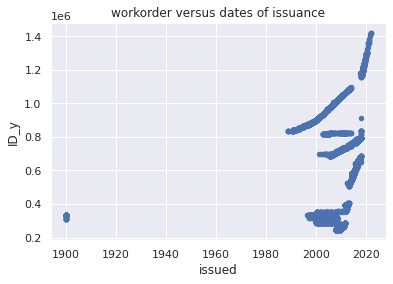

In [ ]:
data_aneshos1woeq.plot(y='ID_y',x='issued',kind='scatter',title='workorder versus dates of issuance')

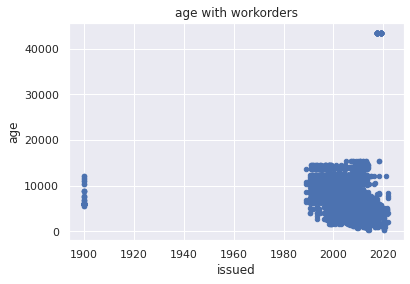

In [ ]:
data_aneshos1woeq.plot(y='age',x='issued',kind='scatter',title='age with workorders')

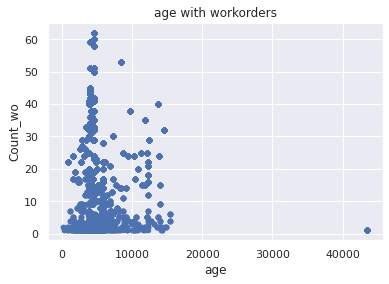

In [ ]:
data_aneshos1woeq.plot(x='age',y='Count_wo',kind='scatter',title='age with workorders')

# **Multiple Regression model for Work Orders and Failing time -Anathesia device**

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
data_aneshos1woeq.shape

(6915, 9)

model pre-processing

table find difference between fault date and register date 

In [ ]:
data_aneshos1woeq['wotime_diff']=(data_aneshos1woeq['issued']-data_aneshos1woeq['Equip.reg_date']).dt.days

In [ ]:
data_aneshos1woeq.head(30)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
68212,2000-01-01,Anestesiarbetsstation,31.0,340376,2000-10-30,68212.0,12,298,6453,303
68212,2000-01-01,Anestesiarbetsstation,31.0,340377,2001-02-16,68212.0,12,298,6453,412
68212,2000-01-01,Anestesiarbetsstation,31.0,340378,2001-02-06,68212.0,12,298,6453,402
68212,2000-01-01,Anestesiarbetsstation,31.0,357998,2010-08-17,68212.0,12,298,6453,3881
68212,2000-01-01,Anestesiarbetsstation,31.0,340379,2001-12-06,68212.0,12,298,6453,705
68212,2000-01-01,Anestesiarbetsstation,31.0,340380,2002-02-01,68212.0,12,298,6453,762
68212,2000-01-01,Anestesiarbetsstation,31.0,340381,2002-03-19,68212.0,12,298,6453,808
68212,2000-01-01,Anestesiarbetsstation,31.0,340382,2002-04-16,68212.0,12,298,6453,836
68212,2000-01-01,Anestesiarbetsstation,31.0,340383,2003-06-25,68212.0,12,298,6453,1271
68212,2000-01-01,Anestesiarbetsstation,31.0,340384,2003-07-02,68212.0,12,298,6453,1278


it is not practical for the model to predict certain date and day , it more commonly practices that there is a time window for the decision to be taken .

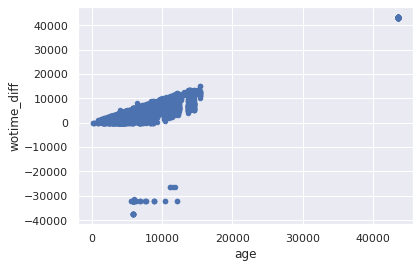

In [ ]:
data_aneshos1woeq.plot(x='age',y='wotime_diff',kind='scatter')

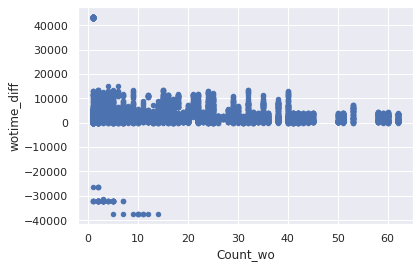

In [ ]:
data_aneshos1woeq.plot(x='Count_wo',y='wotime_diff',kind='scatter')

In [ ]:
data_aneshos1woeq.describe()

,calc.Risk,ID_y,inventarieID,Count_wo,meantime,age,wotime_diff
count,6915.000000,6.915000e+03,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000
mean,30.575127,6.589781e+05,159796.021403,18.919595,282.545047,5822.736949,2881.210701
std,0.566866,2.801951e+05,66727.606017,16.801394,303.558948,3929.198786,5140.988341
min,26.000000,2.427710e+05,65639.000000,1.000000,0.000000,184.000000,-37620.000000
25%,30.000000,3.318115e+05,85327.000000,4.000000,93.000000,4092.000000,1079.500000
50%,31.000000,7.146740e+05,203594.000000,14.000000,191.000000,4649.000000,2363.000000
75%,31.000000,8.514420e+05,219390.000000,31.000000,371.000000,5914.000000,3885.500000
max,31.000000,1.421170e+06,283749.000000,62.000000,2535.000000,43492.000000,43492.000000


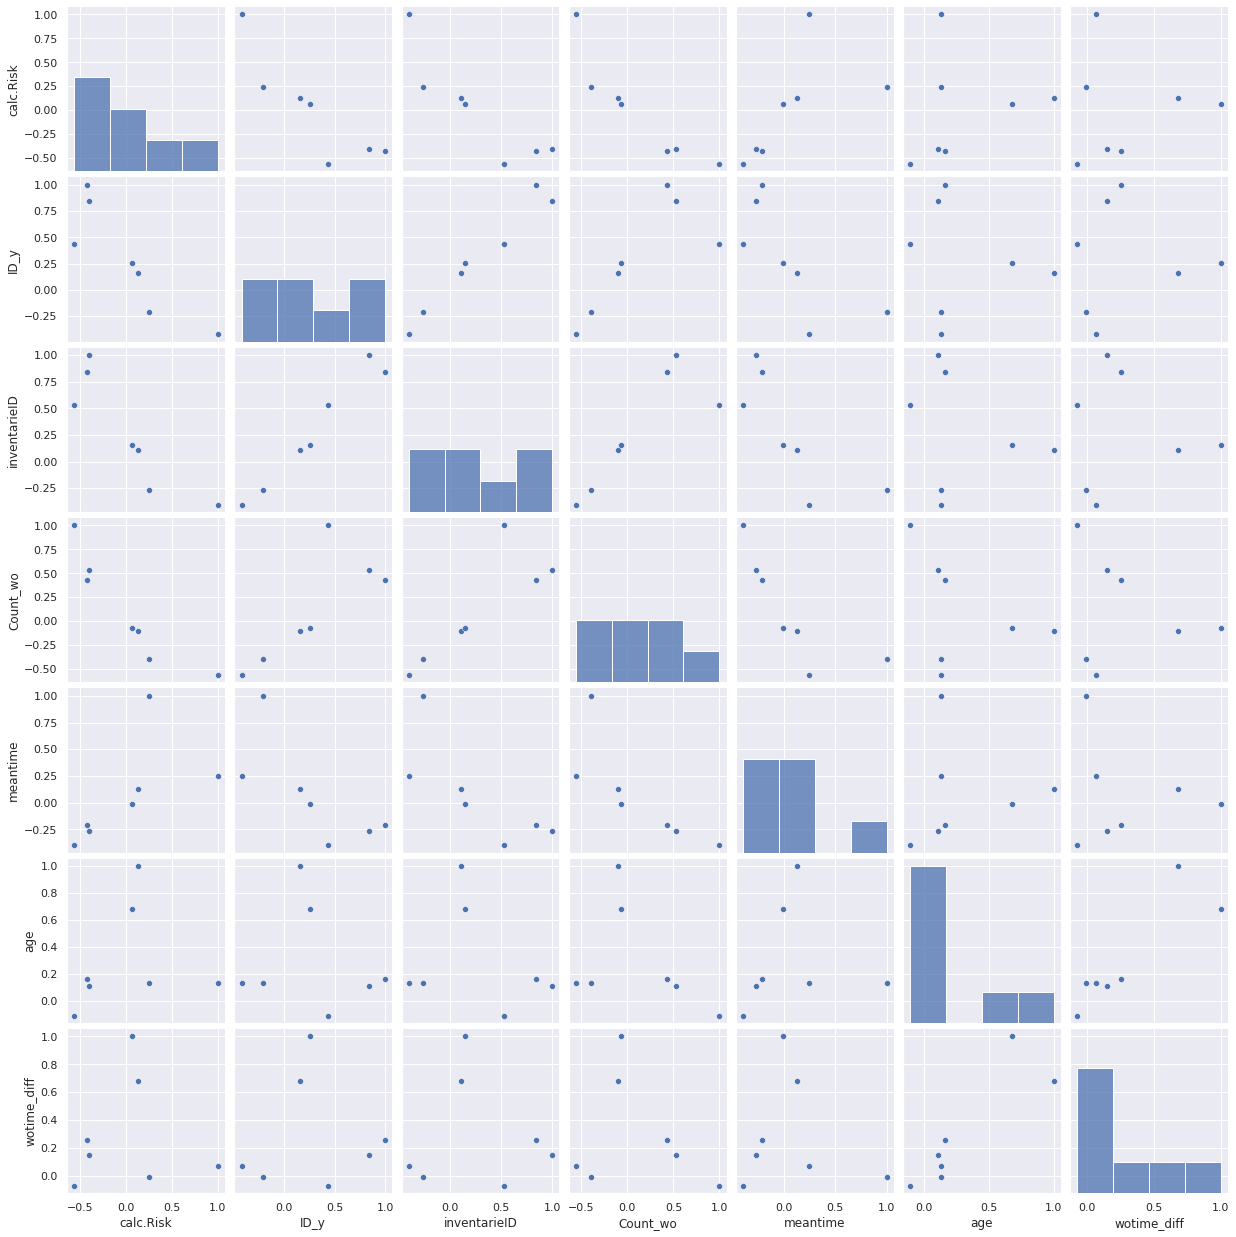

In [ ]:
sns.pairplot(data_aneshos1woeq.corr())

In [ ]:
Y_reghos1=data_aneshos1woeq['wotime_diff']
X_reghos1=data_aneshos1woeq.drop(['dev','ID_y','issued','Equip.reg_date','wotime_diff','inventarieID'],axis=1)


In [ ]:
Y_reghos1.head(3)

68212    303
68212    412
68212    402
Name: wotime_diff, dtype: int64

In [ ]:
X_train_aneshos1, X_test_aneshos1, y_train_aneshos1, y_test_aneshos1 = train_test_split(
    X_reghos1, Y_reghos1, test_size=0.3, random_state=101)

In [ ]:
y_test_aneshos1.head(3)

224950    8719
81838     1756
93489     2947
Name: wotime_diff, dtype: int64

In [ ]:
# creating a regression model
model_anes = LinearRegression()


In [ ]:
model_anes.fit(X_train_aneshos1,y_train_aneshos1)

LinearRegression()

In [ ]:
predictions_anes= model_anes.predict(X_test_aneshos1)


In [ ]:
 predictions_anes

array([4865.27738822, 1771.50398626, 1356.93415428, ..., 3652.68708959,
       8183.95030428,   64.91742033])

In [ ]:
predictions_anes.shape

(2075,)

In [ ]:
predictions_anes_df=pd.DataFrame(predictions_anes)

In [ ]:
age_col=pd.DataFrame(X_reghos1['age'])
age_col=age_col.reset_index()

In [ ]:
age_col.head(3)

,index,age
0,68212,6453
1,68212,6453
2,68212,6453


In [ ]:
pred_fin=pd.concat([predictions_anes_df,age_col],axis=1)

In [ ]:
pred_fin.drop(columns=['index'],axis=1)

,0,age
0,4865.277388,6453
1,1771.503986,6453
2,1356.934154,6453
3,1019.107717,6453
4,1327.928599,6453
...,...,...
6910,NaN,15389
6911,NaN,15389
6912,NaN,15389
6913,NaN,14538


In [ ]:
pred_fin.columns = ['index','wo_timeprednonorm','age']


In [ ]:
pred_fin.head(3)

,index,wo_timeprednonorm,age
0,4865.277388,68212,6453
1,1771.503986,68212,6453
2,1356.934154,68212,6453


In [ ]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test_aneshos1, predictions_anes_df))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_aneshos1, predictions_anes_df))


mean_squared_error :  15641198.006292777
mean_absolute_error :  1686.9077870626415


**Trying normalization and see if it works**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(X_reghos1)
scaled=scaler.fit_transform(X_reghos1)
scaled_df=pd.DataFrame(scaled,columns=X_reghos1.columns)

In [ ]:
scaled_df.shape

(6915, 4)

In [ ]:
scaled_df.head(3)


,calc.Risk,Count_wo,meantime,age
0,1.0,0.180328,0.117554,0.144754
1,1.0,0.180328,0.117554,0.144754
2,1.0,0.180328,0.117554,0.144754


In [ ]:
X_train_aneshos1norm, X_test_aneshos1norm, y_train_aneshos1norm, y_test_aneshos1norm = train_test_split(
    scaled_df, Y_reghos1,test_size=0.3, random_state=101)

In [ ]:
Y_reghos1.head(3)

68212    303
68212    412
68212    402
Name: wotime_diff, dtype: int64

In [ ]:
model_anesnorm = LinearRegression()


In [ ]:
model_anesnorm.fit(X_train_aneshos1norm,y_train_aneshos1norm)

LinearRegression()

In [ ]:
predictions_anesnorm= model_anesnorm.predict(X_test_aneshos1norm)


In [ ]:
predictions_anesnorm

array([4865.27738822, 1771.50398626, 1356.93415428, ..., 3652.68708959,
       8183.95030428,   64.91742033])

In [ ]:
predictions_anes_dfnorm=pd.DataFrame(predictions_anesnorm)

In [ ]:
predictions_anes_dfnorm.head(3)

,0
0,4865.277388
1,1771.503986
2,1356.934154


In [ ]:
predictions_anes_dfnorm.columns = ['wo_timepred']


In [ ]:
predictions_anes_dfnorm.head(3)

,wo_timepred
0,4865.277388
1,1771.503986
2,1356.934154


In [ ]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test_aneshos1, predictions_anes_dfnorm))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_aneshos1, predictions_anes_dfnorm))


mean_squared_error :  15641198.006292777
mean_absolute_error :  1686.9077870626415


In [ ]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test_aneshos1_pm,predictions_anes_pmplus))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_aneshos1_pm,predictions_anes_pmplus))


mean_squared_error :  2553517.4910340505
mean_absolute_error :  1274.3289467576785


# **Regression model for oxygen concentrators**

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
dataoxyhos1.shape

(6247, 9)

In [ ]:
dataoxyhos1.nunique()

Equip.reg_date     106
calc.Risk            2
issued            2455
Count_wo            18
meantime           371
age                395
wotime_diff       2569
dtype: int64

In [ ]:
dataoxyhos1.plot(x='wo')

In [ ]:
dataoxyhos1.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
111459,2001-01-01,Oxygenkoncentrator stationär,31.0,499718,2006-01-25 00:00:00.000,111459.0,5,626,4799
111459,2001-01-01,Oxygenkoncentrator stationär,31.0,500536,2006-03-28 00:00:00.000,111459.0,5,626,4799
111459,2001-01-01,Oxygenkoncentrator stationär,31.0,508183,2007-10-30 00:00:00.000,111459.0,5,626,4799


In [ ]:
dataoxyhos1['Equip.reg_date']=pd.to_datetime(dataoxyhos1['Equip.reg_date'])
dataoxyhos1['issued']=pd.to_datetime(dataoxyhos1['issued'])



In [ ]:
dataoxyhos1.drop(columns=['dev','inventarieID','ID_y'],inplace=True)

In [ ]:
dataoxyhos1['wotime_diff']=(dataoxyhos1['issued']-dataoxyhos1['Equip.reg_date']).dt.days

In [ ]:
dataoxyhos1.head(12)

,Equip.reg_date,calc.Risk,issued,Count_wo,meantime,age,wotime_diff
111459,2001-01-01,31.0,2006-01-25,5,626,4799,1850
111459,2001-01-01,31.0,2006-03-28,5,626,4799,1912
111459,2001-01-01,31.0,2007-10-30,5,626,4799,2493
111459,2001-01-01,31.0,2008-04-01,5,626,4799,2647
111459,2001-01-01,31.0,2008-06-10,5,626,4799,2717
111459,2001-01-01,31.0,2008-08-18,5,626,4799,2786
111459,2001-01-01,31.0,2001-01-05,5,626,4799,4
111459,2001-01-01,31.0,2009-08-04,5,626,4799,3137
111459,2001-01-01,31.0,2002-02-19,5,626,4799,414
111459,2001-01-01,31.0,2002-11-22,5,626,4799,690


In [ ]:
dataoxyhos1.corr()

,calc.Risk,Count_wo,meantime,age,wotime_diff
calc.Risk,1.000000,0.045117,-0.073529,-0.049107,0.004064
Count_wo,0.045117,1.000000,-0.117363,0.439771,0.359941
meantime,-0.073529,-0.117363,1.000000,-0.094614,-0.050114
age,-0.049107,0.439771,-0.094614,1.000000,0.890333
wotime_diff,0.004064,0.359941,-0.050114,0.890333,1.000000


In [ ]:
Y_oxygen=dataoxyhos1['wotime_diff']
X_oxygen=dataoxyhos1.drop(['issued','Equip.reg_date','wotime_diff'],axis=1)


In [ ]:
X_train_oxy1, X_test_oxy1, y_train_oxy1, y_test_oxy1 = train_test_split(X_oxygen,Y_oxygen, test_size=0.3, random_state=101)

In [ ]:
y_train_oxy1.head(3)

120111    2948
232871    8725
124841    1528
Name: wotime_diff, dtype: int64

In [ ]:
model_oxy = LinearRegression()
model_oxy.fit(X_train_oxy1,y_train_oxy1)

LinearRegression()

In [ ]:
predictions_oxy=model_oxy.predict(X_test_oxy1)

In [ ]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test_oxy1, predictions_oxy))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_oxy1, predictions_oxy))


mean_squared_error :  792871.5515134702
mean_absolute_error :  751.0862845805948


# **Multiple regression model after adding more attributes from preventive mainntenance data**

In [ ]:
fin1.head(3)

,invID,last_pm,first_pm,count_pm,meantime_pm
invID,,,,,
204282,204282,2020-03-04,2009-03-31,11,362
255222,255222,2021-06-28,2018-03-20,4,299
208527,208527,2015-06-22,2015-06-22,1,0


In [ ]:
fin1.drop(columns=['last_pm','first_pm'])

,invID,count_pm,meantime_pm
invID,,,
204282,204282,11,362
255222,255222,4,299
208527,208527,1,0
250977,250977,3,166
303506,303506,7,28
...,...,...,...
230121,230121,1,0
213891,213891,3,522
262040,262040,1,0


In [ ]:
#adding some pm data to this dataset
pm_wo_attributes=pd.merge(data_aneshos1woeq,fin1,left_index=True,right_index=True)

In [ ]:
pm_wo_attributes.shape

(6178, 14)

In [ ]:
pm_wo_attributes.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,invID,last_pm,first_pm,count_pm,meantime_pm
65639,1997-01-01,Anestesiapparat mobil,31.0,320715,1998-03-31,65639.0,1,0,1694,65639,2011-04-03,2011-04-03,1,0
65639,1997-01-01,Anestesiapparat mobil,31.0,320716,1998-07-03,65639.0,1,0,1694,65639,2011-04-03,2011-04-03,1,0
65647,1997-01-01,Lungventilator anestesi,31.0,320803,1997-04-11,65647.0,3,307,4325,65647,2011-04-03,2011-04-03,1,0


In [ ]:
pm_wo_attributes.drop(columns=['calc.Risk','inventarieID','invID','last_pm','first_pm'],inplace=True)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
pm_wo_attributes['wotime_diff']=(pm_wo_attributes['issued']-pm_wo_attributes['Equip.reg_date']).dt.days

In [ ]:
pm_wo_attributes.head(3)

,Equip.reg_date,dev,ID_y,issued,Count_wo,meantime,age,count_pm,meantime_pm,wotime_diff
65639,1997-01-01,Anestesiapparat mobil,320715,1998-03-31,1,0,1694,1,0,454
65639,1997-01-01,Anestesiapparat mobil,320716,1998-07-03,1,0,1694,1,0,548
65647,1997-01-01,Lungventilator anestesi,320803,1997-04-11,3,307,4325,1,0,100


In [ ]:
#let us get rid of these negative values first 
pm_wo_attributes2 =pm_wo_attributes[pm_wo_attributes['wotime_diff']>=0]

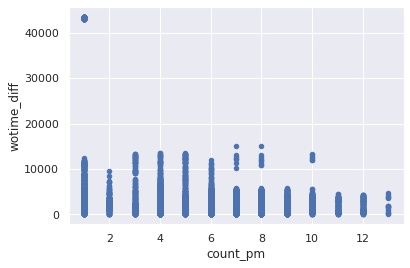

In [ ]:
pm_wo_attributes2.plot(x='count_pm',y='wotime_diff',kind='scatter')

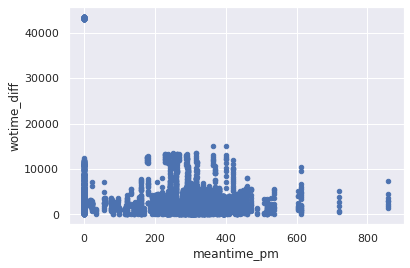

In [ ]:
pm_wo_attributes2.plot(x='meantime_pm',y='wotime_diff',kind='scatter')

In [ ]:
pm_wo_attributes2.describe()

,ID_y,Count_wo,meantime,age,count_pm,meantime_pm,wotime_diff
count,6.117000e+03,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000
mean,6.572387e+05,19.850580,275.883930,5699.824587,5.875429,265.480955,3076.573157
std,2.794675e+05,17.175599,301.299923,4004.755933,3.081970,139.779386,4082.272049
min,2.427710e+05,1.000000,0.000000,910.000000,1.000000,0.000000,0.000000
25%,3.317890e+05,4.000000,91.000000,4092.000000,4.000000,228.000000,1074.000000
50%,7.121230e+05,16.000000,179.000000,4622.000000,6.000000,302.000000,2266.000000
75%,8.211560e+05,32.000000,361.000000,5901.000000,8.000000,346.000000,3746.000000
max,1.421170e+06,62.000000,2535.000000,43492.000000,13.000000,859.000000,43492.000000


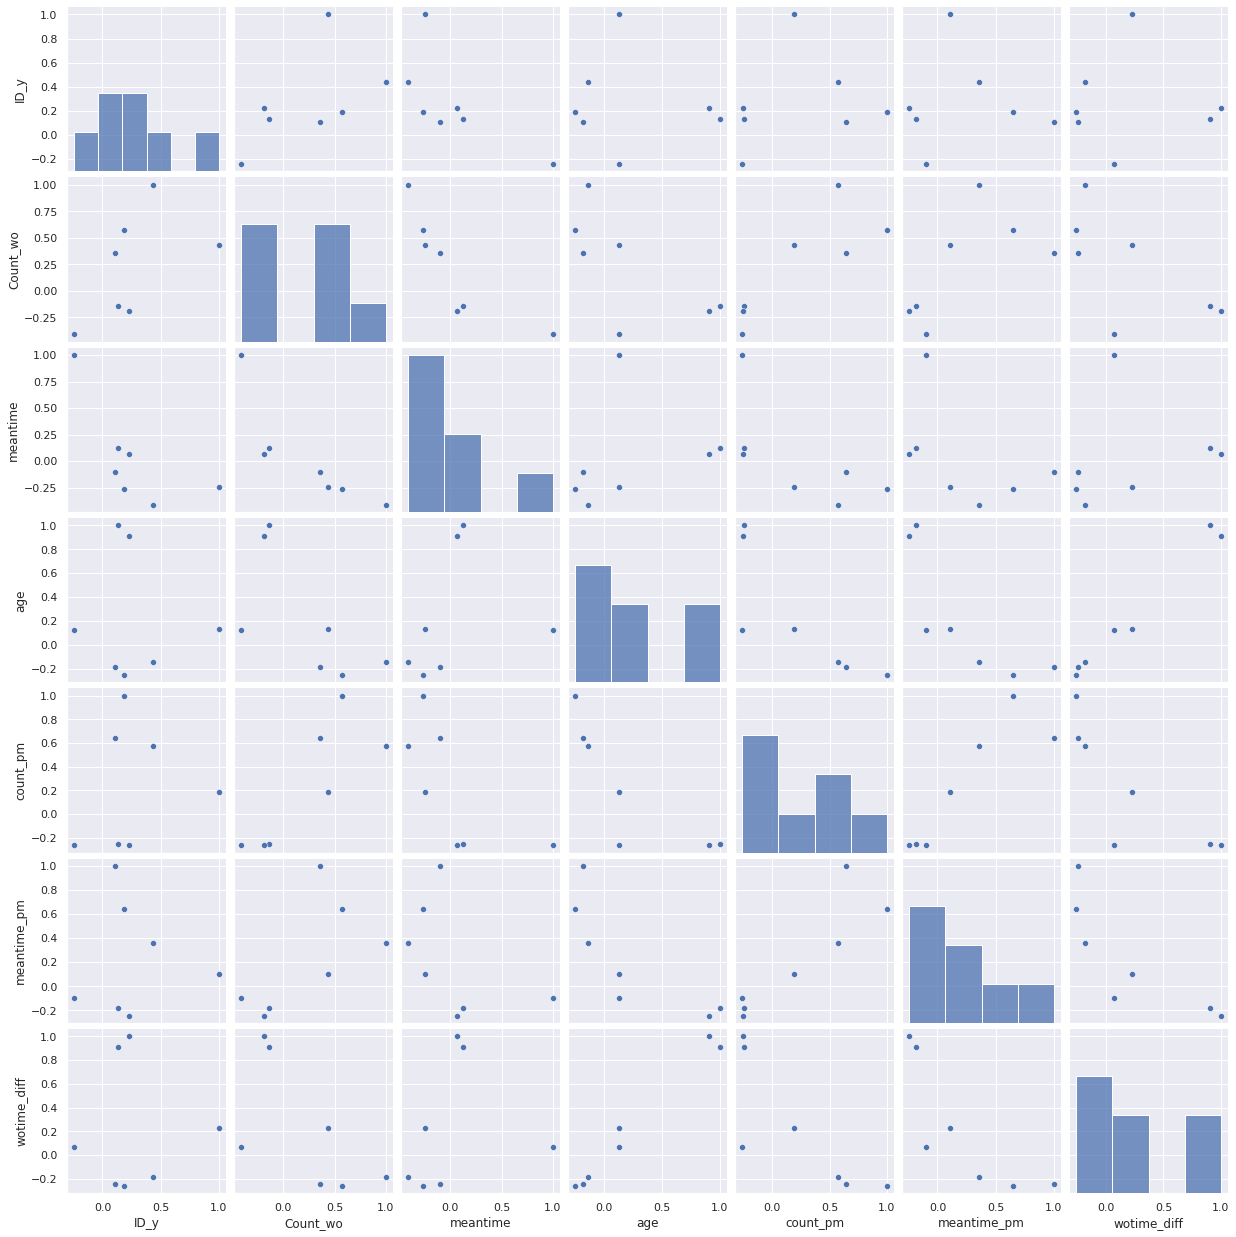

In [ ]:
sns.pairplot(pm_wo_attributes2.corr())

In [ ]:
Y_pmattributehos1=pm_wo_attributes2['wotime_diff']
X_pmattributehos1=pm_wo_attributes2.drop(['Equip.reg_date','dev','ID_y','issued','wotime_diff'],axis=1)


In [ ]:
X_pmattributehos1.shape

(6117, 5)

In [ ]:
X_train_aneshos1_pm, X_test_aneshos1_pm, y_train_aneshos1_pm, y_test_aneshos1_pm = train_test_split(X_pmattributehos1,Y_pmattributehos1, test_size=0.3, random_state=101)

In [ ]:
y_test_aneshos1_pm.shape

(1836,)

In [ ]:
# creating a regression model
model_anes_pmplus = LinearRegression()


In [ ]:
model_anes_pmplus.fit(X_train_aneshos1_pm,y_train_aneshos1_pm)

LinearRegression()

In [ ]:
predictions_anes_pmplus= model_anes_pmplus.predict(X_test_aneshos1_pm)


In [ ]:
predictions_anes_pmplus

array([1472.33503532, 9995.68035214, 1181.78880047, ..., 2221.9615464 ,
       1426.41475834, 4305.2963655 ])

# **Anathesia with ANN using pm data with wo data **

In [ ]:
#Getting the data 
pm_wo_attributes2.head(3)

,Equip.reg_date,dev,ID_y,issued,Count_wo,meantime,age,count_pm,meantime_pm,wotime_diff
65639,1997-01-01,Anestesiapparat mobil,320715,1998-03-31,1,0,1694,1,0,454
65639,1997-01-01,Anestesiapparat mobil,320716,1998-07-03,1,0,1694,1,0,548
65647,1997-01-01,Lungventilator anestesi,320803,1997-04-11,3,307,4325,1,0,100


In [ ]:
Y_pmattributehos1_ann=pm_wo_attributes2['wotime_diff']
X_pmattributehos1_ann=pm_wo_attributes2.drop(['Equip.reg_date','dev','ID_y','issued','wotime_diff'],axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
X_pmattributehos1_ann.head(3)

,Count_wo,meantime,age,count_pm,meantime_pm
65639,1,0,1694,1,0
65639,1,0,1694,1,0
65647,3,307,4325,1,0


In [ ]:
PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X_pmattributehos1_ann)
X_scaled=PredictorScalerFit.transform(X_pmattributehos1_ann)



In [ ]:
X_scaled_ann=pd.DataFrame(X_scaled)

In [ ]:
X_train_aneshos1_pm_ann, X_test_aneshos1_pm_ann, y_train_aneshos1_pm_ann, y_test_aneshos1_pm_ann = train_test_split(X_scaled_ann,Y_pmattributehos1_ann, test_size=0.3, random_state=101)

In [ ]:
X_train_aneshos1_pm_ann.head(3)

,0,1,2,3,4
1650,-0.748249,0.903214,-0.443715,-0.608566,0.669102
3209,1.755507,-0.660140,-0.269158,0.689411,0.919517
4306,1.231465,-0.590437,-0.401512,0.689411,0.933827


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

***ANN Model***

In [ ]:
model_ann = Sequential()


In [ ]:
# Defining the Input layer and FIRST hidden layer, both are same!
model_ann.add(Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'))
#Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_ann.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model_ann.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model_ann.compile(loss='mean_absolute_error', optimizer='adam')

# Fitting the ANN to the Training set
model_ann.fit(X_train_aneshos1_pm_ann,y_train_aneshos1_pm_ann,batch_size = 10, epochs = 100, verbose=1)

Epoch 1/100
429/429 [==============================] - 1s 2ms/step - loss: 3180.4197
Epoch 2/100
429/429 [==============================] - 1s 2ms/step - loss: 3180.0000
Epoch 3/100
429/429 [==============================] - 1s 2ms/step - loss: 3179.5769
Epoch 4/100
429/429 [==============================] - 1s 2ms/step - loss: 3179.1521
Epoch 5/100
429/429 [==============================] - 1s 2ms/step - loss: 3178.7356
Epoch 6/100
429/429 [==============================] - 1s 2ms/step - loss: 3178.3142
Epoch 7/100
429/429 [==============================] - 1s 2ms/step - loss: 3177.8921
Epoch 8/100
429/429 [==============================] - 1s 2ms/step - loss: 3177.4707
Epoch 9/100
429/429 [==============================] - 1s 2ms/step - loss: 3177.0520
Epoch 10/100
429/429 [==============================] - 1s 2ms/step - loss: 3176.6287
Epoch 11/100
429/429 [==============================] - 1s 2ms/step - loss: 3176.2056
Epoch 12/100
429/429 [==============================] - 1s 2ms/

In [ ]:
model_ann_Tanh= Sequential()

In [ ]:
# Defining the Input layer and FIRST hidden layer, both are same!
model_ann_Tanh.add(Dense(units=5, input_dim=5, kernel_initializer='normal', activation='tanh'))
#Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_ann_Tanh.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model_ann_Tanh.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model_ann_Tanh.compile(loss='mean_absolute_error', optimizer='adam')

# Fitting the ANN to the Training set
model_ann_Tanh.fit(X_train_aneshos1_pm_ann,y_train_aneshos1_pm_ann,batch_size = 10, epochs =40, verbose=1)

Epoch 1/40
429/429 [==============================] - 1s 2ms/step - loss: 3179.0730
Epoch 2/40
429/429 [==============================] - 1s 2ms/step - loss: 3175.9617
Epoch 3/40
429/429 [==============================] - 1s 2ms/step - loss: 3173.2585
Epoch 4/40
429/429 [==============================] - 1s 2ms/step - loss: 3170.6497
Epoch 5/40
429/429 [==============================] - 1s 2ms/step - loss: 3168.0786
Epoch 6/40
429/429 [==============================] - 1s 2ms/step - loss: 3165.5288
Epoch 7/40
429/429 [==============================] - 1s 2ms/step - loss: 3162.9937
Epoch 8/40
429/429 [==============================] - 1s 2ms/step - loss: 3160.4651
Epoch 9/40
429/429 [==============================] - 1s 2ms/step - loss: 3157.9443
Epoch 10/40
429/429 [==============================] - 1s 2ms/step - loss: 3155.4272
Epoch 11/40
429/429 [==============================] - 1s 2ms/step - loss: 3152.9111
Epoch 12/40
429/429 [==============================] - 1s 3ms/step - loss:

In [ ]:
model_sigmo=Sequential()

In [ ]:
# Defining the Input layer and FIRST hidden layer, both are same!
model_ann.add(Dense(units=5, input_dim=5, kernel_initializer='normal', activation='sigmoid'))
#Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_ann_Tanh.add(Dense(units=5, kernel_initializer='normal', activation='sigmoid'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model_ann_Tanh.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model_ann_Tanh.compile(loss='mean_absolute_error', optimizer='adam')

# Fitting the ANN to the Training set
model_ann_Tanh.fit(X_train_aneshos1_pm_ann,y_train_aneshos1_pm_ann,batch_size = 10, epochs =40, verbose=1)

Epoch 1/40
429/429 [==============================] - 2s 3ms/step - loss: 3179.3872
Epoch 2/40
429/429 [==============================] - 1s 3ms/step - loss: 3176.5000
Epoch 3/40
429/429 [==============================] - 1s 3ms/step - loss: 3173.8774
Epoch 4/40
429/429 [==============================] - 1s 2ms/step - loss: 3171.3079
Epoch 5/40
429/429 [==============================] - 1s 2ms/step - loss: 3168.7600
Epoch 6/40
429/429 [==============================] - 1s 2ms/step - loss: 3166.2249
Epoch 7/40
429/429 [==============================] - 1s 2ms/step - loss: 3163.6978
Epoch 8/40
429/429 [==============================] - 1s 2ms/step - loss: 3161.1765
Epoch 9/40
429/429 [==============================] - 1s 2ms/step - loss: 3158.6570
Epoch 10/40
429/429 [==============================] - 1s 2ms/step - loss: 3156.1423
Epoch 11/40
429/429 [==============================] - 1s 2ms/step - loss: 3153.6279
Epoch 12/40
429/429 [==============================] - 1s 2ms/step - loss:

In [ ]:
model_mix=Sequential()

In [ ]:
# Defining the Input layer and FIRST hidden layer, both are same!
model_mix.add(Dense(units=5, input_dim=5, kernel_initializer='normal', activation='sigmoid'))
#Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_mix.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model_mix.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model_mix.compile(loss='mean_absolute_error', optimizer='adam')

# Fitting the ANN to the Training set
model_mix.fit(X_train_aneshos1_pm_ann,y_train_aneshos1_pm_ann,batch_size = 10, epochs =100, verbose=1)

Epoch 1/100
429/429 [==============================] - 3s 4ms/step - loss: 3179.5090
Epoch 2/100
429/429 [==============================] - 1s 2ms/step - loss: 3173.5876
Epoch 3/100
429/429 [==============================] - 1s 2ms/step - loss: 3162.6316
Epoch 4/100
429/429 [==============================] - 1s 2ms/step - loss: 3147.3467
Epoch 5/100
429/429 [==============================] - 1s 2ms/step - loss: 3128.4094
Epoch 6/100
429/429 [==============================] - 1s 2ms/step - loss: 3106.2988
Epoch 7/100
429/429 [==============================] - 1s 2ms/step - loss: 3081.3501
Epoch 8/100
429/429 [==============================] - 1s 3ms/step - loss: 3053.7756
Epoch 9/100
429/429 [==============================] - 1s 3ms/step - loss: 3023.8469
Epoch 10/100
429/429 [==============================] - 1s 3ms/step - loss: 2991.9509
Epoch 11/100
429/429 [==============================] - 1s 2ms/step - loss: 2958.2764
Epoch 12/100
429/429 [==============================] - 1s 2ms/

# **multiple regression model for anathesia device type by device type**

**starting with *Anestesiarbetsstation* device type**

In [ ]:
data22.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
68212,2000-01-01,Anestesiarbetsstation,31.0,340376,2000-10-30 00:00:00.000,68212.0,12,298,6453
68212,2000-01-01,Anestesiarbetsstation,31.0,340377,2001-02-16 00:00:00.000,68212.0,12,298,6453
68212,2000-01-01,Anestesiarbetsstation,31.0,340378,2001-02-06 00:00:00.000,68212.0,12,298,6453


In [ ]:
#deciding number of samples
data22.count()

Equip.reg_date    3705
dev               3705
calc.Risk         3705
ID_y              3705
issued            3705
inventarieID      3705
Count_wo          3705
meantime          3705
age               3705
dtype: int64

In [ ]:
data22.isnull().sum()

Equip.reg_date    0
dev               0
calc.Risk         0
ID_y              0
issued            0
inventarieID      0
Count_wo          0
meantime          0
age               0
dtype: int64

In [ ]:
data22['issued']=pd.to_datetime(data22['issued'])

In [ ]:
data22.head(2)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
68212,2000-01-01,Anestesiarbetsstation,31.0,340376,2000-10-30,68212.0,12,298,6453
68212,2000-01-01,Anestesiarbetsstation,31.0,340377,2001-02-16,68212.0,12,298,6453


In [ ]:
data22.issued.value_counts()

2010-12-30    34
2011-01-19    29
2011-01-18    28
2010-04-19    21
2011-01-25    21
              ..
2008-08-08     1
2005-07-11     1
2006-07-24     1
2018-09-19     1
2008-02-26     1
Name: issued, Length: 2018, dtype: int64

In [ ]:
type1_anesstation=data22.sort_values(by="issued")

In [ ]:
type1_anesstation.head(2)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
77237,2003-01-01,Anestesiarbetsstation,31.0,311333,1900-01-01,77237.0,10,401,5914
77242,2003-01-01,Anestesiarbetsstation,31.0,312181,1900-01-01,77242.0,10,428,5914


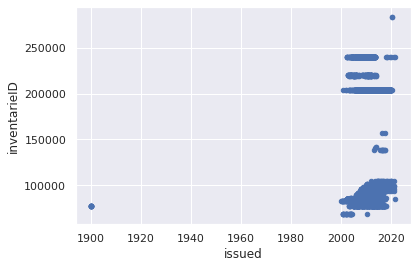

In [ ]:
type1_anesstation.plot(y='inventarieID',x='issued',kind='scatter')

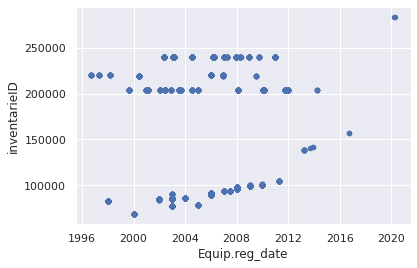

In [ ]:
type1_anesstation.plot(y='inventarieID',x='Equip.reg_date',kind='scatter')

In [ ]:
#deleting these outliers in wo issuance
df1_filtered = type1_anesstation[type1_anesstation['issued'] >='1997-01-01']


In [ ]:
df1_filtered.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
82377,1998-01-01,Anestesiarbetsstation,31.0,288177,2000-03-02,82377.0,18,173,4038
82377,1998-01-01,Anestesiarbetsstation,31.0,288178,2000-05-08,82377.0,18,173,4038
82378,1998-01-01,Anestesiarbetsstation,31.0,288922,2000-05-22,82378.0,30,197,7320


In [ ]:
df1_filtered.shape

(3695, 9)

In [ ]:
df1_filtered['wotime_diff']=(df1_filtered['issued']-df1_filtered['Equip.reg_date']).dt.days

In [ ]:
df1_filtered.head(2)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
82377,1998-01-01,Anestesiarbetsstation,31.0,288177,2000-03-02,82377.0,18,173,4038,791
82377,1998-01-01,Anestesiarbetsstation,31.0,288178,2000-05-08,82377.0,18,173,4038,858


In [ ]:
#sort values by wotime_diff
df1_filtered.sort_values(by='wotime_diff')

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
203641,2011-12-14,Anestesiarbetsstation,30.0,734745,2011-12-13,203641.0,22,37,854,-1
140516,2013-09-03,Anestesiarbetsstation,31.0,527831,2013-09-03,140516.0,1,0,834,0
240338,2006-03-06,Anestesiarbetsstation,30.0,984064,2006-03-06,240338.0,31,129,4139,0
203625,2010-01-07,Anestesiarbetsstation,30.0,722508,2010-01-07,203625.0,24,56,1552,0
240339,2006-03-06,Anestesiarbetsstation,30.0,984065,2006-03-06,240339.0,38,109,4153,0
...,...,...,...,...,...,...,...,...,...,...
82378,1998-01-01,Anestesiarbetsstation,31.0,605362,2015-10-29,82378.0,30,197,7320,6510
82378,1998-01-01,Anestesiarbetsstation,31.0,620341,2016-03-22,82378.0,30,197,7320,6655
82378,1998-01-01,Anestesiarbetsstation,31.0,628368,2016-06-09,82378.0,30,197,7320,6734
82378,1998-01-01,Anestesiarbetsstation,31.0,635544,2016-08-24,82378.0,30,197,7320,6810


# **OXYGEN CONCENTRATOR Model after adding more adding pm attributes**

In [ ]:
pm_wo_attributes_oxygen=pd.merge(dataoxyhos1,fin1,left_index=True,right_index=True)

In [ ]:
pm_wo_attributes_oxygen.head(3)

,Equip.reg_date,calc.Risk,issued,Count_wo,meantime,age,wotime_diff,invID,last_pm,first_pm,count_pm,meantime_pm
114057,2003-01-01,31.0,2008-05-22,4,133,3190,1968,114057,2009-11-05,2009-11-05,1,0
114057,2003-01-01,31.0,2008-08-18,4,133,3190,2056,114057,2009-11-05,2009-11-05,1,0
114057,2003-01-01,31.0,2009-07-28,4,133,3190,2400,114057,2009-11-05,2009-11-05,1,0


In [ ]:
pm_wo_attributes_oxygen.shape

(4882, 12)

In [ ]:
pm_wo_attributes_oxygen.drop(columns=['Equip.reg_date','issued','invID','last_pm','first_pm'])

,calc.Risk,Count_wo,meantime,age,wotime_diff,count_pm,meantime_pm
114057,31.0,4,133,3190,1968,1,0
114057,31.0,4,133,3190,2056,1,0
114057,31.0,4,133,3190,2400,1,0
114057,31.0,4,133,3190,2500,1,0
114170,31.0,4,331,3177,1849,1,0
...,...,...,...,...,...,...,...
151542,31.0,1,0,378,125,1,0
151542,31.0,1,0,378,36,1,0
154468,31.0,1,0,227,3,1,0
154468,31.0,1,0,227,49,1,0


**regression model**

In [ ]:
Y_pmattributehos1_oxy=pm_wo_attributes_oxygen['wotime_diff']
X_pmattributehos1_oxy=pm_wo_attributes_oxygen.drop(['wotime_diff'],axis=1)


In [ ]:
Y_pmattributehos1_oxy.head(3)

114057    1968
114057    2056
114057    2400
Name: wotime_diff, dtype: int64

In [ ]:
X_pmattributehos1_oxy.head(3)

,Equip.reg_date,calc.Risk,issued,Count_wo,meantime,age,invID,last_pm,first_pm,count_pm,meantime_pm
114057,2003-01-01,31.0,2008-05-22,4,133,3190,114057,2009-11-05,2009-11-05,1,0
114057,2003-01-01,31.0,2008-08-18,4,133,3190,114057,2009-11-05,2009-11-05,1,0
114057,2003-01-01,31.0,2009-07-28,4,133,3190,114057,2009-11-05,2009-11-05,1,0


# **Multiple Regression model for Work Orders and Failing time -Anathesia device**

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
data_aneshos1woeq.shape

(6915, 10)

In [ ]:
data_aneshos1woeq.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
68212,2000-01-01,Anestesiarbetsstation,31.0,340376,2000-10-30,68212.0,12,298,6453,303
68212,2000-01-01,Anestesiarbetsstation,31.0,340377,2001-02-16,68212.0,12,298,6453,412
68212,2000-01-01,Anestesiarbetsstation,31.0,340378,2001-02-06,68212.0,12,298,6453,402


model pre-processing

we need to create a table which uses issued wo dates to get a number called fail_point in the device age and then use this table as a label for the rows and feed to the regression model as the dependent variable 

table find difference between fault date and register date 

In [ ]:
data_aneshos1woeq['wotime_diff']=(data_aneshos1woeq['issued']-data_aneshos1woeq['Equip.reg_date']).dt.days

In [ ]:
data_aneshos1woeq.head(12)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
68212,2000-01-01,Anestesiarbetsstation,31.0,340376,2000-10-30,68212.0,12,298,6453,303
68212,2000-01-01,Anestesiarbetsstation,31.0,340377,2001-02-16,68212.0,12,298,6453,412
68212,2000-01-01,Anestesiarbetsstation,31.0,340378,2001-02-06,68212.0,12,298,6453,402
68212,2000-01-01,Anestesiarbetsstation,31.0,357998,2010-08-17,68212.0,12,298,6453,3881
68212,2000-01-01,Anestesiarbetsstation,31.0,340379,2001-12-06,68212.0,12,298,6453,705
68212,2000-01-01,Anestesiarbetsstation,31.0,340380,2002-02-01,68212.0,12,298,6453,762
68212,2000-01-01,Anestesiarbetsstation,31.0,340381,2002-03-19,68212.0,12,298,6453,808
68212,2000-01-01,Anestesiarbetsstation,31.0,340382,2002-04-16,68212.0,12,298,6453,836
68212,2000-01-01,Anestesiarbetsstation,31.0,340383,2003-06-25,68212.0,12,298,6453,1271
68212,2000-01-01,Anestesiarbetsstation,31.0,340384,2003-07-02,68212.0,12,298,6453,1278


it is not practical for the model to predict certain date and day , it more commonly practices that there is a time window for the decision to be taken .

In [ ]:
data_aneshos1woeq.describe()

,calc.Risk,ID_y,inventarieID,Count_wo,meantime,age,wotime_diff
count,6915.000000,6.915000e+03,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000
mean,30.575127,6.589781e+05,159796.021403,18.919595,282.545047,5822.736949,2881.210701
std,0.566866,2.801951e+05,66727.606017,16.801394,303.558948,3929.198786,5140.988341
min,26.000000,2.427710e+05,65639.000000,1.000000,0.000000,184.000000,-37620.000000
25%,30.000000,3.318115e+05,85327.000000,4.000000,93.000000,4092.000000,1079.500000
50%,31.000000,7.146740e+05,203594.000000,14.000000,191.000000,4649.000000,2363.000000
75%,31.000000,8.514420e+05,219390.000000,31.000000,371.000000,5914.000000,3885.500000
max,31.000000,1.421170e+06,283749.000000,62.000000,2535.000000,43492.000000,43492.000000


In [ ]:
data_aneshos1woeq.corr()

,calc.Risk,ID_y,inventarieID,Count_wo,meantime,age,wotime_diff
calc.Risk,1.000000,-0.422425,-0.403802,-0.561037,0.246708,0.130602,0.067960
ID_y,-0.422425,1.000000,0.843494,0.431639,-0.208996,0.159591,0.258469
inventarieID,-0.403802,0.843494,1.000000,0.530676,-0.267497,0.108059,0.150923
Count_wo,-0.561037,0.431639,0.530676,1.000000,-0.396531,-0.107938,-0.070943
meantime,0.246708,-0.208996,-0.267497,-0.396531,1.000000,0.130392,-0.008263
age,0.130602,0.159591,0.108059,-0.107938,0.130392,1.000000,0.679378
wotime_diff,0.067960,0.258469,0.150923,-0.070943,-0.008263,0.679378,1.000000


In [ ]:
Y=data_aneshos1woeq['wotime_diff']
X=data_aneshos1woeq.drop(['dev','ID_y','issued','Equip.reg_date','wotime_diff','inventarieID'],axis=1)


In [ ]:
X.head(3)

,calc.Risk,Count_wo,meantime,age
68212,31.0,12,298,6453
68212,31.0,12,298,6453
68212,31.0,12,298,6453


In [ ]:
X_train_aneshos1, X_test_aneshos1, y_train_aneshos1, y_test_aneshos1 = train_test_split(
    X, Y, test_size=0.3, random_state=101)

In [ ]:
y_test_aneshos1

224950    8719
81838     1756
93489     2947
240332     729
195155    3546
          ... 
77202     4332
203600    3731
203582    3518
243759    6224
141627     569
Name: wotime_diff, Length: 2075, dtype: int64

In [ ]:
y_test_aneshos1.head(3)

224950    8719
81838     1756
93489     2947
Name: wotime_diff, dtype: int64

In [ ]:
# creating a regression model
model_anes = LinearRegression()


In [ ]:
model_anes.fit(X_train_aneshos1,y_train_aneshos1)

LinearRegression()

In [ ]:
predictions_anes= model_anes.predict(X_test_aneshos1)


In [ ]:
 predictions_anes

array([4865.27738822, 1771.50398626, 1356.93415428, ..., 3652.68708959,
       8183.95030428,   64.91742033])

In [ ]:
predictions_anes=predictions_anes.round(0)

In [ ]:
predictions_anes.shape

(2075,)

In [ ]:
predictions_anes

array([4865., 1772., 1357., ..., 3653., 8184.,   65.])

In [ ]:
con_df=pd.DataFrame(predictions_anes)
type(con_df)

pandas.core.frame.DataFrame

In [ ]:
con_df

,0
0,4865.0
1,1772.0
2,1357.0
3,1019.0
4,1328.0
...,...
2070,2876.0
2071,1906.0
2072,3653.0
2073,8184.0


In [ ]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test_aneshos1, predictions_anes))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_aneshos1, predictions_anes))


mean_squared_error :  15641188.756144578
mean_absolute_error :  1686.8978313253012


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
cmn = confusion_matrix(y_test_aneshos1, predictions_anes)

# **CONNECTING PM-data With WO COMBINED DATA**

In [ ]:
inner_mergeWO_pm = pd.merge(inner_merged_total_WO,fin1,left_index=True, right_index=True)

In [ ]:
inner_mergeWO_pm.head(15)

,ID,issued,Completed,AOEkKlarDat,InventarieID,inventarieID,last_wo,first_wo,Count_wo,meantime,invID,last_pm,first_pm,count_pm,meantime_pm
1364.0,242555,2011-03-25 00:00:00.000,2011-03-25 00:00:00.000,2011-03-25 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364.0,282186,2011-05-14 00:00:00.000,2011-05-14 00:00:00.000,2011-05-14 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364.0,282305,2011-05-18 00:00:00.000,2011-05-18 00:00:00.000,2011-05-18 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364.0,359761,2011-10-25 00:00:00.000,2011-10-26 00:00:00.000,2011-10-26 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364.0,393299,2012-07-18 00:00:00.000,2012-12-21 00:00:00.000,2012-12-21 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364.0,393467,2012-07-23 00:00:00.000,2012-12-21 00:00:00.000,2012-12-21 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364.0,394949,2012-08-24 00:00:00.000,2013-01-28 00:00:00.000,2013-01-28 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364.0,396907,2012-09-30 00:00:00.000,2012-09-30 00:00:00.000,2012-09-30 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364.0,397564,2012-10-09 00:00:00.000,2012-10-09 00:00:00.000,2012-10-09 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364.0,363896,2012-02-07 00:00:00.000,2012-02-23 00:00:00.000,2012-02-23 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0


# **Connecting pm history data with wo data and equipment tables**

In [ ]:
inner_merge_pmhistwithwo = pd.merge(inner_merged_total_WO,fin1,left_index=True, right_index=True)

# **Connecting pm and wo with equipments(all data together)**

bringing eq data and setting ID field as an index to prepare for merge

In [ ]:
fin.shape

(83584, 8)

In [ ]:
eq=fin.set_index('ID',drop=False)

In [ ]:
eq.head(3)

,InvNr,Equip.reg_date,Scrapped_date,ID,dev,Brand,Model,calc.Risk
ID,,,,,,,,
68264,C951-02,2001-02-08 00:00:00.000,2018-12-19 00:00:00.000,68264,Endoskop,Wolf,Wolf 5512,31.0
112347,P384,1981-01-01 00:00:00.000,2012-07-19 00:00:00.000,112347,Ljuskälla f endoskop,Wolf,4015,31.0
88325,C0297,1985-01-01 00:00:00.000,2015-12-16 00:00:00.000,88325,Ljuskälla f endoskop,Wolf,4015,31.0


In [ ]:
all_data_together= pd.merge(eq,inner_mergeWO_pm,left_index=True, right_index=True)

In [ ]:
all_data_together.head(10)

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,ID_y,issued,...,inventarieID,last_wo,first_wo,Count_wo,meantime,invID,last_pm,first_pm,count_pm,meantime_pm
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,242555,2011-03-25 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282186,2011-05-14 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282305,2011-05-18 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,359761,2011-10-25 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,393299,2012-07-18 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,393467,2012-07-23 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,394949,2012-08-24 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,396907,2012-09-30 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,397564,2012-10-09 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,363896,2012-02-07 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0


In [ ]:
all_data_together=all_data_together.drop(columns=['InvNr','issued','Completed','InventarieID','first_wo','invID'])

In [ ]:
all_data_together.shape

(205291, 17)

In [ ]:
all_data_together.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,ID_y,AOEkKlarDat,inventarieID,last_wo,Count_wo,meantime,last_pm,first_pm,count_pm,meantime_pm
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,242555,2011-03-25 00:00:00.000,1364.0,2020-08-13,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282186,2011-05-14 00:00:00.000,1364.0,2020-08-13,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282305,2011-05-18 00:00:00.000,1364.0,2020-08-13,65,52,2019-10-24,2019-10-24,1,0


### **Performing Data Pre-processing on all data **

In [ ]:
all_data_together.shape

(205291, 17)

In [ ]:
all_data_together.count()

Equip.reg_date    205291
Scrapped_date     205291
ID_x              205291
dev               205291
Brand             205291
Model             205291
calc.Risk         205291
ID_y              205291
AOEkKlarDat       205291
inventarieID      205291
last_wo           205291
Count_wo          205291
meantime          205291
last_pm           205291
first_pm          205291
count_pm          205291
meantime_pm       205291
dtype: int64

In [ ]:
all_data_together.drop(columns=['Model','AOEkKlarDat','first_pm','last_pm','inventarieID'],inplace=True)

In [ ]:
all_data_together.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,18.0,242555,2020-08-13,65,52,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,18.0,282186,2020-08-13,65,52,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,18.0,282305,2020-08-13,65,52,1,0


**change equipment register dates outliers by creating new age column then see outliers within the age** but then this will not be an accurate approach

In [ ]:
all_data_together.describe()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm
count,205291.000000,205291.000000,2.052910e+05,205291.000000,205291.000000,205291.000000,205291.000000
mean,147317.016679,27.408898,6.498871e+05,19.346732,380.512877,4.552435,249.442085
std,62783.138857,6.021128,2.989154e+05,38.597893,389.665795,5.941790,202.570336
min,1364.000000,5.000000,6.400000e+02,1.000000,0.000000,1.000000,0.000000
25%,89358.000000,26.000000,3.674135e+05,4.000000,109.000000,1.000000,0.000000
50%,125546.000000,31.000000,6.210620e+05,8.000000,280.000000,3.000000,279.000000
75%,207378.500000,31.000000,8.197370e+05,17.000000,512.000000,6.000000,370.000000
max,302368.000000,32.000000,1.436496e+06,405.000000,4240.000000,117.000000,2474.000000


In [ ]:
all_data_together['Equip.reg_date']=pd.to_datetime(all_data_together['Equip.reg_date'])
all_data_together['Scrapped_date']=pd.to_datetime(all_data_together['Scrapped_date'])

In [ ]:
all_data_together.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
1364,2010-01-01,2021-09-21,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,18.0,242555,2020-08-13,65,52,1,0
1364,2010-01-01,2021-09-21,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,18.0,282186,2020-08-13,65,52,1,0
1364,2010-01-01,2021-09-21,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,18.0,282305,2020-08-13,65,52,1,0


plotting equipment reg date

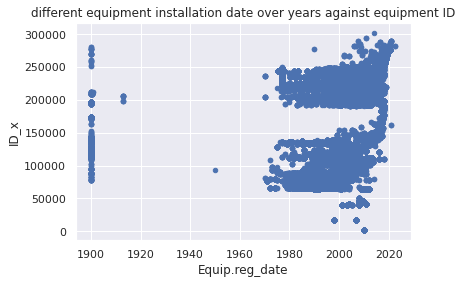

In [ ]:
all_data_together.plot(x='Equip.reg_date',y='ID_x',kind='scatter',title='different equipment installation date over years against equipment ID')

will try to check for the number of samples which has outlier values

this nearly 3000 samples of data as outliers 

In [ ]:
no_outlier=all_data_together.loc[all_data_together['Equip.reg_date']>='1980-01-01']

In [ ]:
no_outlier.shape

(202158, 12)

In [ ]:
yes_outlier=all_data_together.loc[all_data_together['Equip.reg_date']<='1980-01-01']

In [ ]:
yes_outlier.shape

(3422, 12)

In [ ]:
yes_outlier

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
65470,1974-01-01,2004-06-18,65470,Lungventilator intensivvård,Maquet,31.0,319122,1997-10-23,3,65,1,0
65470,1974-01-01,2004-06-18,65470,Lungventilator intensivvård,Maquet,31.0,319123,1997-10-23,3,65,1,0
65470,1974-01-01,2004-06-18,65470,Lungventilator intensivvård,Maquet,31.0,319124,1997-10-23,3,65,1,0
65470,1974-01-01,2004-06-18,65470,Lungventilator intensivvård,Maquet,31.0,319125,1997-10-23,3,65,1,0
65470,1974-01-01,2004-06-18,65470,Lungventilator intensivvård,Maquet,31.0,319126,1997-10-23,3,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
278327,1900-01-01,2021-11-05,278327,Termometer öron IR,Braun,13.0,1371993,2021-09-01,4,158,1,0
278327,1900-01-01,2021-11-05,278327,Termometer öron IR,Braun,13.0,1397437,2021-09-01,4,158,1,0
280276,1900-01-01,2022-02-14,280276,Defibrillator halvautomatisk (AED),Laerdal,26.0,1290876,2020-05-06,1,0,2,170
280276,1900-01-01,2022-02-14,280276,Defibrillator halvautomatisk (AED),Laerdal,26.0,1301078,2020-05-06,1,0,2,170


we have to remove duplicates from these data
the function in pandas to do this is (drop_duplicates), it takes subset as the column to check for duplicates in and takes keep argument to choose first or last row to keep in case if found duplicates. 

In [ ]:
no_outlier.drop_duplicates(subset='ID_x',keep='last',inplace=True)

In [ ]:
no_outlier.shape

(20921, 12)

as you can see after removing duplicates data due to having many work order or pm activity for the same device , this is the real data remaining 20,921 samples

# **Oxygenkoncentrator**


In [ ]:

all_data_together1_oxygen=no_outlier.query("dev == 'Oxygenkoncentrator stationär'")


In [ ]:
all_data_together1_oxygen.shape

(660, 12)

based on the different work order no. the device main data remains the same across different work orders , so we need to take out any identical data for the same device by comparing records together in all columns and get unique sets of devices with unique inventarieID for each one.

In [ ]:
Testa1=all_data_together1_oxygen.drop_duplicates(subset='ID_x')

In [ ]:
Testa1.shape

(660, 12)

In [ ]:
Testa1.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
114057,2003-01-01,2011-09-26,114057,Oxygenkoncentrator stationär,DeVilbiss,31.0,429195,2009-11-05,4,133,1,0
114170,2003-01-01,2011-09-13,114170,Oxygenkoncentrator stationär,DeVilbiss,31.0,454988,2011-09-12,4,331,1,0
114836,2006-01-01,2012-09-24,114836,Oxygenkoncentrator stationär,Respironics,31.0,470833,2012-09-24,7,236,1,0


age of device new column by converting dates into datetime objects

In [ ]:
Testa1['Equip.reg_date']=pd.to_datetime(Testa1['Equip.reg_date'])

In [ ]:
Testa1['Scrapped_date']=pd.to_datetime(Testa1['Scrapped_date'])

In [ ]:
Testa1.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
114057,2003-01-01,2011-09-26,114057,Oxygenkoncentrator stationär,DeVilbiss,31.0,429195,2009-11-05,4,133,1,0
114170,2003-01-01,2011-09-13,114170,Oxygenkoncentrator stationär,DeVilbiss,31.0,454988,2011-09-12,4,331,1,0
114836,2006-01-01,2012-09-24,114836,Oxygenkoncentrator stationär,Respironics,31.0,470833,2012-09-24,7,236,1,0


In [ ]:
Testa1["age"]=(Testa1["Scrapped_date"]-Testa1["Equip.reg_date"]).dt.days


In [ ]:
Testa1.head(4)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm,age
114057,2003-01-01,2011-09-26,114057,Oxygenkoncentrator stationär,DeVilbiss,31.0,429195,2009-11-05,4,133,1,0,3190
114170,2003-01-01,2011-09-13,114170,Oxygenkoncentrator stationär,DeVilbiss,31.0,454988,2011-09-12,4,331,1,0,3177
114836,2006-01-01,2012-09-24,114836,Oxygenkoncentrator stationär,Respironics,31.0,470833,2012-09-24,7,236,1,0,2458
114851,2004-01-01,2013-06-05,114851,Oxygenkoncentrator stationär,Respironics,31.0,492698,2013-06-05,6,289,1,0,3443


In [ ]:
Testa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 114057 to 154839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Equip.reg_date  660 non-null    datetime64[ns]
 1   Scrapped_date   660 non-null    datetime64[ns]
 2   ID_x            660 non-null    int64         
 3   dev             660 non-null    object        
 4   Brand           660 non-null    object        
 5   calc.Risk       660 non-null    float64       
 6   ID_y            660 non-null    int64         
 7   last_wo         660 non-null    object        
 8   Count_wo        660 non-null    int64         
 9   meantime        660 non-null    int64         
 10  count_pm        660 non-null    int64         
 11  meantime_pm     660 non-null    int64         
 12  age             660 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 72.2+ KB


In [ ]:
Testa1.describe()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age
count,660.000000,660.0,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,128779.989394,31.0,492876.751515,5.407576,238.584848,2.430303,179.750000,2300.039394
std,8579.323180,0.0,58511.321476,3.171708,162.647063,1.396828,170.075078,863.395753
min,114057.000000,31.0,414027.000000,1.000000,0.000000,1.000000,0.000000,213.000000
25%,124116.750000,31.0,458679.750000,3.000000,144.500000,1.000000,0.000000,1901.500000
50%,126595.500000,31.0,469747.500000,5.000000,242.500000,2.000000,173.500000,2329.000000
75%,130558.250000,31.0,476426.250000,8.000000,332.000000,3.000000,302.250000,2884.500000
max,154839.000000,31.0,635212.000000,16.000000,1426.000000,9.000000,1407.000000,4799.000000


In [ ]:
Testa1.corr()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age
ID_x,1.000000,NaN,0.827278,-0.720669,-0.524875,0.050285,-0.080654,-0.880238
calc.Risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_y,0.827278,NaN,1.000000,-0.569831,-0.592199,-0.051764,-0.229201,-0.717568
Count_wo,-0.720669,NaN,-0.569831,1.000000,0.286964,-0.121850,-0.070993,0.625201
meantime,-0.524875,NaN,-0.592199,0.286964,1.000000,0.059952,0.227631,0.552365
count_pm,0.050285,NaN,-0.051764,-0.121850,0.059952,1.000000,0.455205,0.108735
meantime_pm,-0.080654,NaN,-0.229201,-0.070993,0.227631,0.455205,1.000000,0.231656
age,-0.880238,NaN,-0.717568,0.625201,0.552365,0.108735,0.231656,1.000000


# Decision tree with oxgen concentrators

labeling data based on the meantime between work orders

In [ ]:
Testa1["Label"]=np.where(Testa1['meantime']<=236,0,1)
#0 represents healthy device and 1 represents unhealthy de

In [ ]:
 Y=Testa1["Label"].copy()
 

In [ ]:
Testa1.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm,age,Label
114057,2003-01-01,2011-09-26,114057,Oxygenkoncentrator stationär,DeVilbiss,31.0,429195,2009-11-05,4,133,1,0,3190,0
114170,2003-01-01,2011-09-13,114170,Oxygenkoncentrator stationär,DeVilbiss,31.0,454988,2011-09-12,4,331,1,0,3177,1
114836,2006-01-01,2012-09-24,114836,Oxygenkoncentrator stationär,Respironics,31.0,470833,2012-09-24,7,236,1,0,2458,0


taking meantime column out before feeding the model

In [ ]:
Testa1.drop(columns=['Equip.reg_date','Scrapped_date','Brand','meantime'],inplace=True)

In [ ]:
Testa1.drop(columns=['ID_x','ID_y','last_wo'],inplace=True)

In [ ]:
Testa1.head(3)

,dev,calc.Risk,Count_wo,count_pm,meantime_pm,age,Label
114057,Oxygenkoncentrator stationär,31.0,4,1,0,3190,0
114170,Oxygenkoncentrator stationär,31.0,4,1,0,3177,1
114836,Oxygenkoncentrator stationär,31.0,7,1,0,2458,0


In [ ]:
Testa1.drop(columns=['dev'],inplace=True)

In [ ]:
Testa1.shape

(660, 6)

In [ ]:
X=Testa1
Y.head(3)

114057    0
114170    1
114836    0
Name: Label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape


(462, 6)

In [ ]:
y_train.shape

(462,)

In [ ]:
clf_gini02 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)


In [ ]:
History=clf_gini02.fit(X_train, y_train)

In [ ]:
X_test.count()

calc.Risk      198
Count_wo       198
count_pm       198
meantime_pm    198
age            198
Label          198
dtype: int64

In [ ]:
y_pred = History.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 1 0]


In [ ]:
cm = confusion_matrix(y_test, y_pred)

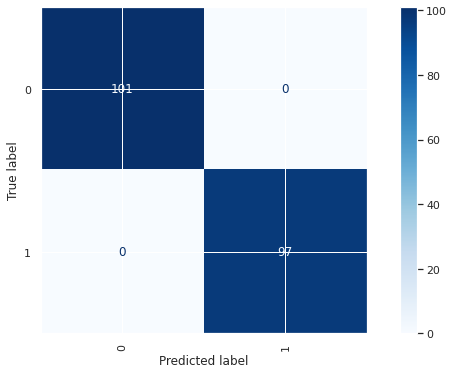

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.gcf().set_size_inches(12,6)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

# **patient monitor with Decision tree **

In [ ]:
all_data_together_pamonitor=no_outlier.query("dev == 'Patientmonitor multiparameter'")


In [ ]:
all_data_together_pamonitor.shape

(1344, 12)

In [ ]:
all_data_together_pamonitor.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
65590,1981-01-01,2000-12-22,65590,Patientmonitor multiparameter,Simonsen & Weel,31.0,325509,1996-04-25,1,0,1,0
65591,1980-01-01,2017-04-05,65591,Patientmonitor multiparameter,Simonsen & Weel,31.0,325510,2001-04-09,1,0,1,0
65595,1983-01-01,2008-07-22,65595,Patientmonitor multiparameter,Simonsen & Weel,31.0,322781,1997-08-29,2,234,1,0


In [ ]:
testa2=all_data_together_pamonitor.drop_duplicates(subset='ID_x')

In [ ]:
testa2.shape

(1344, 12)

In [ ]:
testa2['Equip.reg_date']=pd.to_datetime(testa2['Equip.reg_date'])

In [ ]:
testa2['Scrapped_date']=pd.to_datetime(testa2['Scrapped_date'])

In [ ]:
testa2.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
65590,1981-01-01,2000-12-22,65590,Patientmonitor multiparameter,Simonsen & Weel,31.0,325509,1996-04-25,1,0,1,0
65591,1980-01-01,2017-04-05,65591,Patientmonitor multiparameter,Simonsen & Weel,31.0,325510,2001-04-09,1,0,1,0
65595,1983-01-01,2008-07-22,65595,Patientmonitor multiparameter,Simonsen & Weel,31.0,322781,1997-08-29,2,234,1,0


In [ ]:
testa2["age"]=(testa2["Scrapped_date"]-testa2["Equip.reg_date"]).dt.days


In [ ]:
testa2.head(4)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm,age
65590,1981-01-01,2000-12-22,65590,Patientmonitor multiparameter,Simonsen & Weel,31.0,325509,1996-04-25,1,0,1,0,7295
65591,1980-01-01,2017-04-05,65591,Patientmonitor multiparameter,Simonsen & Weel,31.0,325510,2001-04-09,1,0,1,0,13609
65595,1983-01-01,2008-07-22,65595,Patientmonitor multiparameter,Simonsen & Weel,31.0,322781,1997-08-29,2,234,1,0,9334
65596,1983-01-01,2004-02-02,65596,Patientmonitor multiparameter,Simonsen & Weel,31.0,322788,2000-09-25,1,0,1,0,7702


In [ ]:
testa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 65590 to 258274
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Equip.reg_date  1344 non-null   datetime64[ns]
 1   Scrapped_date   1344 non-null   datetime64[ns]
 2   ID_x            1344 non-null   int64         
 3   dev             1344 non-null   object        
 4   Brand           1344 non-null   object        
 5   calc.Risk       1344 non-null   float64       
 6   ID_y            1344 non-null   int64         
 7   last_wo         1344 non-null   object        
 8   Count_wo        1344 non-null   int64         
 9   meantime        1344 non-null   int64         
 10  count_pm        1344 non-null   int64         
 11  meantime_pm     1344 non-null   int64         
 12  age             1344 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 147.0+ KB


In [ ]:
testa2.describe()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age
count,1344.000000,1344.000000,1.344000e+03,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,162105.708333,26.257440,7.583942e+05,4.735119,474.141369,5.276042,256.511161,4163.911458
std,67518.818739,6.421815,4.042407e+05,4.136871,455.084302,10.209663,195.593516,1768.022677
min,65590.000000,16.000000,2.432300e+05,1.000000,0.000000,1.000000,0.000000,581.000000
25%,87875.000000,17.000000,3.299010e+05,2.000000,137.750000,2.000000,20.750000,2980.750000
50%,202818.500000,31.000000,7.316470e+05,4.000000,387.000000,4.000000,283.000000,3881.000000
75%,219192.250000,31.000000,1.091480e+06,6.000000,664.000000,6.000000,376.000000,5143.000000
max,258274.000000,32.000000,1.435723e+06,48.000000,3143.000000,106.000000,1295.000000,13609.000000


In [ ]:
testa2.corr()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age
ID_x,1.000000,-0.323433,0.811546,0.039202,-0.288936,0.127429,0.091957,-0.445764
calc.Risk,-0.323433,1.000000,-0.468821,0.033904,-0.039576,0.053905,-0.345032,0.220201
ID_y,0.811546,-0.468821,1.000000,-0.000563,-0.167743,0.107634,0.210036,-0.451536
Count_wo,0.039202,0.033904,-0.000563,1.000000,-0.021508,0.177234,0.147152,0.212460
meantime,-0.288936,-0.039576,-0.167743,-0.021508,1.000000,0.061263,0.200571,0.207867
count_pm,0.127429,0.053905,0.107634,0.177234,0.061263,1.000000,-0.024060,0.070891
meantime_pm,0.091957,-0.345032,0.210036,0.147152,0.200571,-0.024060,1.000000,-0.042553
age,-0.445764,0.220201,-0.451536,0.212460,0.207867,0.070891,-0.042553,1.000000


In [ ]:
testa2["Label"]=np.where(testa2['meantime']<=236,0,1)


In [ ]:
 Y=testa2["Label"].copy()


In [ ]:
Y.head(3)

65590    0
65591    0
65595    0
Name: Label, dtype: int64

In [ ]:
testa2.drop(columns=['ID_x','ID_y','meantime'],inplace=True)

In [ ]:
testa2.head(3)

,Equip.reg_date,Scrapped_date,dev,Brand,calc.Risk,last_wo,Count_wo,count_pm,meantime_pm,age,Label
65590,1981-01-01,2000-12-22,Patientmonitor multiparameter,Simonsen & Weel,31.0,1996-04-25,1,1,0,7295,0
65591,1980-01-01,2017-04-05,Patientmonitor multiparameter,Simonsen & Weel,31.0,2001-04-09,1,1,0,13609,0
65595,1983-01-01,2008-07-22,Patientmonitor multiparameter,Simonsen & Weel,31.0,1997-08-29,2,1,0,9334,0


In [ ]:
testa2.drop(columns=['dev','Brand','last_wo','Equip.reg_date','Scrapped_date'])

,calc.Risk,Count_wo,count_pm,meantime_pm,age,Label
65590,31.0,1,1,0,7295,0
65591,31.0,1,1,0,13609,0
65595,31.0,2,1,0,9334,0
65596,31.0,1,1,0,7702,0
65597,31.0,3,1,0,7410,0
...,...,...,...,...,...,...
255813,17.0,3,1,0,1449,0
255818,17.0,2,1,0,1449,1
255828,31.0,4,2,180,2019,0
256625,31.0,1,1,0,961,0


In [ ]:
X01=testa2.drop(columns=['Label','dev','Equip.reg_date','Scrapped_date','Brand','last_wo'])
Y01=Y

In [ ]:
X_train01, X_test01, y_train01, y_test01 = train_test_split( 
          X01, Y01, test_size = 0.3, random_state = 100)

In [ ]:
y_train01.head(5)

203092    1
217738    0
108373    1
77660     0
202829    0
Name: Label, dtype: int64

In [ ]:
clf_gini01 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)


In [ ]:
X_train01.head(3)

,calc.Risk,Count_wo,count_pm,meantime_pm,age
203092,17.0,7,5,529,3870
217738,31.0,1,1,0,11158
108373,31.0,5,5,326,2903


In [ ]:
History01=clf_gini01.fit(X_train01, y_train01)

In [ ]:
y_pred01 = History01.predict(X_test01)
print("Predicted values:")
print(y_pred01)

Predicted values:
[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1]


In [ ]:
cm01 = confusion_matrix(y_test01, y_pred01)

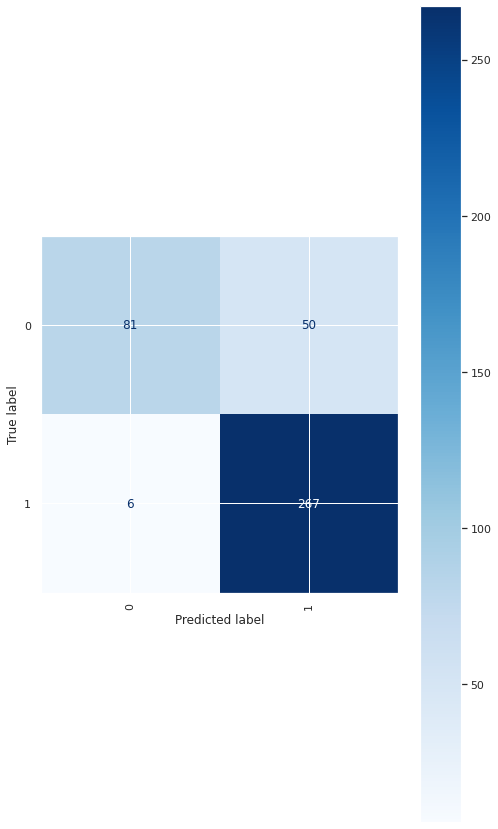

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm01)
disp.plot(cmap=plt.cm.Blues)
plt.gcf().set_size_inches(8,15)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

# **anathesia with decision tree**

In [ ]:
all_data_together.shape

(205291, 12)

In [ ]:
data2=all_data_together.query("dev == 'Anestesiarbetsstation'")
data3=all_data_together.query("dev == 'Modul till anestesiarbetsstation'")
data4=all_data_together.query("dev == 'Anestesimedelsförgasare, isofluran'")
data5=all_data_together.query("dev == 'Anestesimedel Förgasare'")
data6=all_data_together.query("dev == 'Anestesiapparat mobil'")
data7=all_data_together.query("dev == 'Lungventilator anestesi'")
data_anes = pd.concat([data2, data3, data4, data5, data6, data7], axis=0)
data_anes.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340376,2010-08-17,12,298,1,0
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340377,2010-08-17,12,298,1,0
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340378,2010-08-17,12,298,1,0


In [ ]:
data_anes.shape

(6178, 12)

In [ ]:
#take out duplicatestesta2=all_data_together_pamonitor.drop_duplicates(subset='ID_x')

testa3=data_anes.drop_duplicates(subset='ID_x')

In [ ]:
testa3.shape

(462, 12)

In [ ]:
testa3['Equip.reg_date']=pd.to_datetime(testa3['Equip.reg_date'])

In [ ]:
testa3['Scrapped_date']=pd.to_datetime(testa3['Scrapped_date'])

In [ ]:
testa3.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340376,2010-08-17,12,298,1,0
68213,2000-01-01,2017-09-01,68213,Anestesiarbetsstation,Dräger,31.0,340389,2004-02-25,9,134,1,0
77202,2003-01-01,2019-03-12,77202,Anestesiarbetsstation,Dräger,31.0,312978,2016-06-02,9,385,8,302


In [ ]:
testa3["age"]=(testa3["Scrapped_date"]-testa3["Equip.reg_date"]).dt.days


In [ ]:
testa3.head(4)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm,age
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340376,2010-08-17,12,298,1,0,6453
68213,2000-01-01,2017-09-01,68213,Anestesiarbetsstation,Dräger,31.0,340389,2004-02-25,9,134,1,0,6453
77202,2003-01-01,2019-03-12,77202,Anestesiarbetsstation,Dräger,31.0,312978,2016-06-02,9,385,8,302,5914
77207,2003-01-01,2019-03-12,77207,Anestesiarbetsstation,Dräger,31.0,283000,2018-02-12,11,371,8,302,5914


In [ ]:
testa3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 68212 to 231346
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Equip.reg_date  462 non-null    datetime64[ns]
 1   Scrapped_date   462 non-null    datetime64[ns]
 2   ID_x            462 non-null    int64         
 3   dev             462 non-null    object        
 4   Brand           462 non-null    object        
 5   calc.Risk       462 non-null    float64       
 6   ID_y            462 non-null    int64         
 7   last_wo         462 non-null    object        
 8   Count_wo        462 non-null    int64         
 9   meantime        462 non-null    int64         
 10  count_pm        462 non-null    int64         
 11  meantime_pm     462 non-null    int64         
 12  age             462 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 50.5+ KB


In [ ]:
testa3.describe()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age
count,462.000000,462.000000,4.620000e+02,462.000000,462.000000,462.000000,462.000000,462.000000
mean,150499.145022,30.764069,5.714497e+05,8.722944,306.056277,3.803030,179.841991,7089.038961
std,64642.067062,0.521311,2.565140e+05,11.887810,371.940635,2.992063,170.701421,8268.169084
min,65639.000000,26.000000,2.659920e+05,1.000000,0.000000,1.000000,0.000000,910.000000
25%,85327.500000,31.000000,3.171465e+05,1.000000,0.000000,1.000000,0.000000,3800.000000
50%,173405.500000,31.000000,6.712195e+05,3.000000,189.000000,3.000000,209.000000,4738.000000
75%,209546.500000,31.000000,7.118770e+05,12.000000,471.000000,6.000000,313.000000,6453.000000
max,243763.000000,31.000000,1.418885e+06,62.000000,2535.000000,13.000000,859.000000,43492.000000


In [ ]:
testa3.corr()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age
ID_x,1.000000,-0.314737,0.923006,0.335738,-0.172366,0.012551,-0.042938,0.100034
calc.Risk,-0.314737,1.000000,-0.335030,-0.463504,0.101762,-0.405345,-0.284938,0.071611
ID_y,0.923006,-0.335030,1.000000,0.261495,-0.101087,-0.028348,-0.067947,0.136664
Count_wo,0.335738,-0.463504,0.261495,1.000000,-0.131506,0.543307,0.366509,-0.129540
meantime,-0.172366,0.101762,-0.101087,-0.131506,1.000000,-0.039843,0.076072,-0.076137
count_pm,0.012551,-0.405345,-0.028348,0.543307,-0.039843,1.000000,0.718886,-0.191382
meantime_pm,-0.042938,-0.284938,-0.067947,0.366509,0.076072,0.718886,1.000000,-0.196082
age,0.100034,0.071611,0.136664,-0.129540,-0.076137,-0.191382,-0.196082,1.000000


In [ ]:
testa3["Label"]=np.where(testa3['meantime']>=306,0,1)
#0 means there is no problem with the device
#1 means there is  a problem with the device


In [ ]:
 Y=testa3["Label"].copy()


In [ ]:
Y.head(3)

68212    1
68213    1
77202    0
Name: Label, dtype: int64

In [ ]:
testa3.drop(columns=['dev','Brand','last_wo','Equip.reg_date','Scrapped_date'])

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age,Label
68212,68212,31.0,340376,12,298,1,0,6453,1
68213,68213,31.0,340389,9,134,1,0,6453,1
77202,77202,31.0,312978,9,385,8,302,5914,0
77207,77207,31.0,283000,11,371,8,302,5914,0
77237,77237,31.0,311329,10,401,8,302,5914,0
...,...,...,...,...,...,...,...,...,...
231342,231342,31.0,873279,2,2058,1,0,6923,0
231343,231343,31.0,873280,6,824,10,134,6678,0
231344,231344,30.0,873278,10,686,2,536,6862,0
231345,231345,31.0,877971,2,150,9,163,6690,1


In [ ]:
X02=testa3.drop(columns=['Label','dev','Equip.reg_date','Scrapped_date','Brand','last_wo'])
Y02=Y

In [ ]:
X_train02, X_test02, y_train02, y_test02 = train_test_split( 
          X02, Y02, test_size = 0.3, random_state = 100)

In [ ]:
y_train02.head(5)

84885     0
219927    1
93921     0
240333    1
225129    0
Name: Label, dtype: int64

In [ ]:
clf_gini_ana = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)


In [ ]:
X_train02.head(3)

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age
84885,84885,31.0,301115,9,531,6,346,5859
219927,219927,31.0,818110,10,291,1,0,5846
93921,93921,31.0,280857,2,401,4,529,4033


In [ ]:
History02=clf_gini01.fit(X_train02, y_train02)

In [ ]:
y_pred02 = History02.predict(X_test02)
print("Predicted values:")
print(y_pred02)

Predicted values:
[0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0]


In [ ]:
cm02 = confusion_matrix(y_test02, y_pred02)

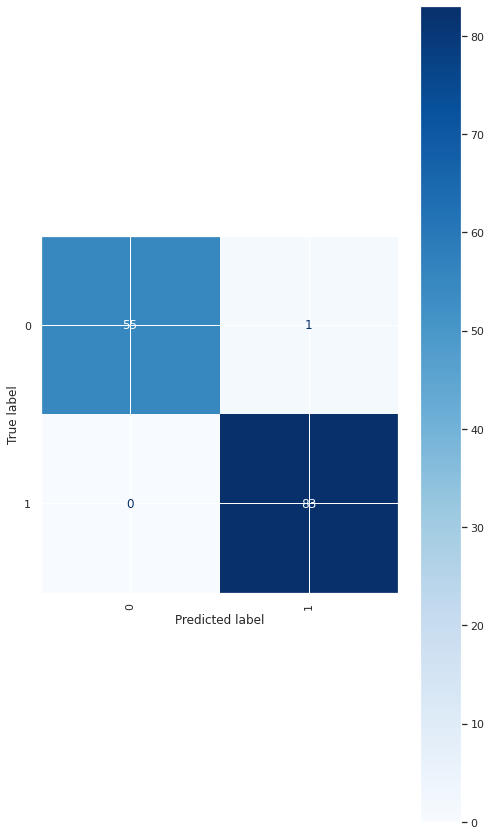

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm02)
disp.plot(cmap=plt.cm.Blues)
plt.gcf().set_size_inches(8,15)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

# **Anathesia with Neural networks**

In [ ]:
import tensorflow as tf
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.covariance import EllipticEnvelope
from glob import glob
import re
import gc
import seaborn as sns

In [ ]:
from tensorflow import keras


In [ ]:
from pandas.core.arrays.sparse import dtype


In [ ]:
from sklearn import preprocessing

In [ ]:
labels=['Healthy_device','Unhealthy_device']

In [ ]:
data_anes.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340376,2010-08-17,12,298,1,0
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340377,2010-08-17,12,298,1,0
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340378,2010-08-17,12,298,1,0


In [ ]:
test_ana=data_anes.drop_duplicates(subset='ID_x')

In [ ]:
test_ana.shape

(462, 12)

In [ ]:
test_ana["age"]=(test_ana["Scrapped_date"]-test_ana["Equip.reg_date"]).dt.days


In [ ]:
test_ana["Label"]=np.where(test_ana['meantime']>=306,0,1)


In [ ]:
test_ana.shape

(462, 14)

In [ ]:
test_ana.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm,age,Label
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340376,2010-08-17,12,298,1,0,6453,1
68213,2000-01-01,2017-09-01,68213,Anestesiarbetsstation,Dräger,31.0,340389,2004-02-25,9,134,1,0,6453,1
77202,2003-01-01,2019-03-12,77202,Anestesiarbetsstation,Dräger,31.0,312978,2016-06-02,9,385,8,302,5914,0


In [ ]:
test_ana.drop(columns=['Equip.reg_date','Scrapped_date','ID_x','dev','Brand','calc.Risk','ID_y','last_wo','meantime'],inplace=True)

In [ ]:
test_ana.head(3)

,Count_wo,count_pm,meantime_pm,age,Label
68212,12,1,0,6453,1
68213,9,1,0,6453,1
77202,9,8,302,5914,0


Hyper-parameters and input data

In [ ]:
training_data = testa3.sample(frac=0.8, random_state=25)
testing_data = testa3.drop(training_data.index)

print(f"No.of training examples: {training_data.shape[0]}")
print(f"No.of testing examples: {testing_data.shape[0]}")

No.of training examples: 370
No.of testing examples: 92


In [ ]:
X_train=training_data.filter(['calc.Risk','Count_wo','count_pm','meantime_pm','age','label'])

In [ ]:
X_train.head(3)

,calc.Risk,Count_wo,count_pm,meantime_pm,age
84610,29.0,13,4,207,7189
231337,31.0,4,2,307,6773
217977,31.0,2,1,0,10793


In [ ]:
training_data.head()

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm,age,Label
84610,2002-01-01,2021-09-07,84610,Anestesiarbetsstation,GE Healthcare,29.0,300155,2021-09-07,13,541,4,207,7189,0
231337,1996-09-02,2015-03-20,231337,Lungventilator anestesi,Anmedic,31.0,873284,2010-04-15,4,1243,2,307,6773,0
217977,1983-01-01,2012-07-20,217977,Anestesiapparat mobil,Siemens,31.0,819262,1993-02-24,2,17,1,0,10793,1
225097,1977-01-01,2014-09-24,225097,Anestesiapparat mobil,AGA,30.0,1007388,2010-10-18,5,223,5,238,13780,1
209556,2005-01-31,2010-03-25,209556,Modul till anestesiarbetsstation,GE Healthcare,31.0,693710,2005-01-31,1,0,1,0,1879,1


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation="sigmoid"))
model.add(keras.layers.Dense(25, activation="sigmoid"))
model.add(keras.layers.Dense(2, activation="sigmoid"))

In [ ]:
keras.backend.clear_session()
np.random.seed(60)
tf.random.set_seed(50)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# **Studies on preventive maintenance activities**

# **from all data patterns **

In [ ]:
all_data_together.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
1364,2010-01-01,2021-09-21,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,18.0,242555,2020-08-13,65,52,1,0
1364,2010-01-01,2021-09-21,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,18.0,282186,2020-08-13,65,52,1,0
1364,2010-01-01,2021-09-21,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,18.0,282305,2020-08-13,65,52,1,0


In [ ]:
all_data_together.shape

(205291, 12)

oxygen concentrators average preventive maintenance data 

age has strong correlation with count of work orders done , does it has a correlation with meanttime between work orders ?

In [ ]:
Testa1.describe()

,calc.Risk,Count_wo,count_pm,meantime_pm,age,Label
count,660.0,660.000000,660.000000,660.000000,660.000000,660.000000
mean,31.0,5.407576,2.430303,179.750000,2300.039394,0.512121
std,0.0,3.171708,1.396828,170.075078,863.395753,0.500232
min,31.0,1.000000,1.000000,0.000000,213.000000,0.000000
25%,31.0,3.000000,1.000000,0.000000,1901.500000,0.000000
50%,31.0,5.000000,2.000000,173.500000,2329.000000,1.000000
75%,31.0,8.000000,3.000000,302.250000,2884.500000,1.000000
max,31.0,16.000000,9.000000,1407.000000,4799.000000,1.000000


In [ ]:
Testa1.corr()

,calc.Risk,Count_wo,count_pm,meantime_pm,age,Label
calc.Risk,NaN,NaN,NaN,NaN,NaN,NaN
Count_wo,NaN,1.000000,-0.121850,-0.070993,0.625201,0.217337
count_pm,NaN,-0.121850,1.000000,0.455205,0.108735,0.096766
meantime_pm,NaN,-0.070993,0.455205,1.000000,0.231656,0.245774
age,NaN,0.625201,0.108735,0.231656,1.000000,0.419188
Label,NaN,0.217337,0.096766,0.245774,0.419188,1.000000


there is a high correlation between count of workorders and age 
also there is high correlation between count of pm and meantime between pm
-what we are interested is finding 
1-average time between pm for oxygen concenterators and the average age for these devices?

**average meatime between pm activities for the oxygen concentrators is 5.7 months or 173 days .**

**average age for oxygen concentrators is 2329 days or 6.4 years.**

**average workorders within life time of an oxygen concentrator is 5 work orders and average meantime between workorders is 242 days or 8 months **

**we need to select all data which has it pm activities for more than 5.7 months and see if we get more work orders or not ?**

In [ ]:
from numpy.core.multiarray import where
Testa1["Label_delay"]=np.where(Testa1['meantime_pm']>=173,1,0)


In [ ]:
Testa1.head(3)

,calc.Risk,Count_wo,count_pm,meantime_pm,age,Label,Label_delay
114057,31.0,4,1,0,3190,0,0
114170,31.0,4,1,0,3177,1,0
114836,31.0,7,1,0,2458,0,0


In [ ]:
Testa1.shape

(660, 7)

In [ ]:
Testa1.Label_delay.value_counts()

0    330
1    330
Name: Label_delay, dtype: int64

In [ ]:
Testa1.corr()

,calc.Risk,Count_wo,count_pm,meantime_pm,age,Label,Label_delay
calc.Risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count_wo,NaN,1.000000,-0.121850,-0.070993,0.625201,0.217337,-0.044461
count_pm,NaN,-0.121850,1.000000,0.455205,0.108735,0.096766,0.492831
meantime_pm,NaN,-0.070993,0.455205,1.000000,0.231656,0.245774,0.830628
age,NaN,0.625201,0.108735,0.231656,1.000000,0.419188,0.229845
Label,NaN,0.217337,0.096766,0.245774,0.419188,1.000000,0.230371
Label_delay,NaN,-0.044461,0.492831,0.830628,0.229845,0.230371,1.000000


# **PM_His7**

***glossary for PM-his7 data : ***

[blnRecurring] LW: Is scheduled as recurring. Meaning it after the PM is completed, another PM session will be scheduled.
      ,[intTimeInterval] LW: The period between the recurring schedules. Related to if bInRecurring is true.
      ,[PM_TimeIntervalUnitID] LW: The unit type of the period between the recurring schedules i.e. days, months. bInRecurring is true.
      ,[intTimeIntervalRecommended] LW: Is this data populated? It’s the same as [PM_TimeInterval] but what is recommend by the manufacturer.
      ,[PM_TimeIntervalUnitIDRecommended] LW: Is this data populated? It’s the same as [PM_TimeIntervalUnitID] but what is recommend by the manufacturer.
      ,[intEstimatedPMTimeHours] LW: Estimation of how long the PM will take to perform
      ,convert(date,[datLatest]) LW: Latest performed PM.
      ,convert(date,[datNext]) LW: The upcoming PM to be performed.
      ,[InventarierID] LW: Equipment ID
      ,workorderid AS [ArborderID] LW: Work Order ID
      ,[blnHiddenPMClock] LW: Not sure, could you give examples of how the data looks?
      ,[DeviatingTimeIntervalRecommended] LW: Is this data populated?
        ,DATEDIFF(DD,[datLatest],[datCreated]) AS PM_diff LW: The number of days between when the PM should have been performed and when it was performed.

In [ ]:
df8=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/pm_history.csv")

In [ ]:
 data8= pd.read_csv(df8,sep=';',header=0)

In [ ]:
data8

,(No column name),ID,blnRecurring,intTimeInterval,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,InventarierID,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
0,2011-04-03,27837,1,24.0,2.0,NaN,NaN,NaN,2001-06-15,2003-06-15,65129,NaN,0.0,1,3579
1,2011-04-03,28001,1,24.0,2.0,NaN,NaN,NaN,2004-03-17,2006-03-17,65375,NaN,0.0,1,2573
2,2011-04-03,28245,1,12.0,2.0,NaN,NaN,NaN,2003-07-11,2004-07-11,65657,NaN,0.0,1,2823
3,2011-04-03,28739,1,12.0,2.0,NaN,NaN,NaN,2000-02-15,2001-02-15,66297,NaN,0.0,1,4065
4,2011-04-03,28982,1,12.0,2.0,NaN,NaN,NaN,2001-11-09,2002-11-09,66601,NaN,0.0,1,3432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268514,2020-08-31,111399,1,12.0,2.0,NaN,NaN,NaN,2020-08-31,2020-08-12,139137,1322680.0,0.0,0,0
268515,2020-08-31,218051,1,175.0,3.0,NaN,NaN,NaN,2020-06-26,2020-06-01,265560,1311557.0,0.0,0,66
268516,2020-08-31,218145,1,175.0,3.0,NaN,NaN,NaN,2020-06-26,2020-06-01,266504,1311608.0,0.0,0,66
268517,2020-08-31,218142,1,175.0,3.0,NaN,NaN,NaN,2020-06-26,2020-06-01,266501,1311605.0,0.0,0,66


In [ ]:
data8.isnull().sum()

(No column name)                         0
ID                                       0
blnRecurring                             0
intTimeInterval                      29965
PM_TimeIntervalUnitID                29639
intTimeIntervalRecommended          243017
PM_TimeIntervalUnitIDRecommended    194394
intEstimatedPMTimeHours             196105
(No column name).1                       0
(No column name).2                   84728
InventarierID                            0
ArborderID                           28826
blnHiddenPMClock                      5605
DeviatingTimeIntervalRecommended         0
PM_diff                                  0
dtype: int64

In [ ]:
#dict = {'FUSenaste': 'prevPm',
       # 'FUIntNasta': 'nexPm',
        #'InkDat':'Equip.reg_date',
        #'SkrotDatum':'Scrapped_date',
        #'Benamn':'dev',
      #'Fabrikat':'Brand',
        #'Modell':'Model',
        #'intRisktal':'calc.Risk'}

In [ ]:
#fin.rename(columns=dict,inplace=True)

In [ ]:
len(data8)

268519

**substitute scrapped null values with data collection**

In [ ]:
data8.dropna(inplace=True)

In [ ]:
data8.shape

(10112, 15)

In [ ]:
data8

,(No column name),ID,blnRecurring,intTimeInterval,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,InventarierID,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
1023,2018-01-17,83275,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-16,150152,816359.0,0.0,0,0
1024,2018-01-17,83273,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-18,150150,816367.0,0.0,0,0
1060,2018-01-15,87846,1,24.0,2.0,24.0,2.0,"2,5",2018-01-15,2018-06-02,152970,684821.0,0.0,0,0
1065,2018-01-16,73705,1,12.0,2.0,12.0,2.0,4,2018-01-16,2017-07-19,145683,816120.0,0.0,0,0
1071,2018-01-17,83277,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-16,150154,816361.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268478,2020-08-25,125680,1,24.0,2.0,24.0,2.0,2,2020-08-25,2020-12-04,207197,1322230.0,0.0,0,0
268479,2020-08-25,46732,1,12.0,2.0,12.0,2.0,1,2020-08-25,2020-06-12,100411,1322248.0,0.0,0,0
268481,2020-08-26,160603,1,24.0,2.0,24.0,2.0,2,2020-08-26,2020-04-17,256375,1322392.0,0.0,0,0
268494,2020-08-27,169666,1,24.0,2.0,24.0,2.0,"2,5",2020-08-27,2020-10-03,263114,1322686.0,0.0,0,0


loading all preventive maintenance queries again,this time we need to connect those data to specific devices so that we can relate between equipment , age and pm data using inventarierID as a reference 

---



In [ ]:
data8.set_index('InventarierID',inplace=True)

In [ ]:
data8.head(3)

,(No column name),ID,blnRecurring,intTimeInterval,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
InventarierID,,,,,,,,,,,,,,
150152,2018-01-17,83275,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-16,816359.0,0.0,0,0
150150,2018-01-17,83273,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-18,816367.0,0.0,0,0
152970,2018-01-15,87846,1,24.0,2.0,24.0,2.0,"2,5",2018-01-15,2018-06-02,684821.0,0.0,0,0


In [ ]:
all_pm_fields= pd.merge(eq,data8,left_index=True, right_index=True)

In [ ]:
all_pm_fields.head(5)

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,(No column name),ID_y,...,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
65630,C147-05,2000-01-01 00:00:00.000,2021-07-15 00:00:00.000,65630,Handventilator gasdriven,Fisher & Paykel,Neopuff RD900,27.0,2021-01-28,28217,...,2.0,12.0,2.0,2,2021-01-28,2020-05-20,1352350.0,0.0,0,0
68232,C944-01,2000-01-01 00:00:00.000,2019-03-07 00:00:00.000,68232,Rökevakueringssystem kirurgiskt,Erbe,IES 300,31.0,2018-01-22,30055,...,2.0,12.0,2.0,"0,5",2018-01-22,2016-09-09,816904.0,0.0,0,0
68235,C944-04,2001-01-01 00:00:00.000,2015-12-02 00:00:00.000,68235,Rökevakueringssystem kirurgiskt,Erbe,IES 300,31.0,2014-10-23,30058,...,2.0,12.0,2.0,1,2014-10-23,2014-10-21,567403.0,0.0,1,0
68236,C944-05,2001-01-01 00:00:00.000,2017-03-03 00:00:00.000,68236,Rökevakueringssystem kirurgiskt,Erbe,IES 300,31.0,2014-12-05,30060,...,2.0,12.0,2.0,1,2014-12-05,2011-03-01,572212.0,0.0,1,0
77274,C914-08,2003-01-01 00:00:00.000,2021-05-05 00:00:00.000,77274,"Infusionspump, sprut- Nätdriven",CareFusion,Alaris CC Guardrails Plus,22.0,2020-02-11,35144,...,2.0,36.0,2.0,"2,5",2020-02-11,2020-02-22,1285667.0,0.0,0,0


In [ ]:
all_pm_fields.shape

(1099, 22)

In [ ]:
oxygen=all_pm_fields.query("dev=='Anestesiarbetsstation'")



In [ ]:
oxygen

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,(No column name),ID_y,...,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
203629,204249,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203629,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-02-23,130058,...,2.0,12.0,2.0,6,2018-02-23,2018-02-10,836566.0,0.0,0,0
203632,204252,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203632,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-12-04,134768,...,2.0,12.0,2.0,6,2018-12-04,2019-10-05,1208266.0,0.0,0,0
203632,204252,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203632,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-10-05,134768,...,2.0,12.0,2.0,6,2018-10-05,2018-12-12,794547.0,0.0,0,0
203634,204254,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203634,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-12-06,121384,...,2.0,12.0,2.0,6,2018-12-06,2018-08-10,1209006.0,0.0,0,0
203635,204255,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203635,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-11-29,130045,...,2.0,12.0,2.0,6,2018-11-29,2018-10-10,1207496.0,0.0,0,0
203636,204256,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203636,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-11-22,121386,...,2.0,12.0,2.0,6,2018-11-22,2018-12-18,1205970.0,0.0,0,0
203637,204257,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203637,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2019-04-26,130048,...,2.0,12.0,2.0,6,2019-04-26,2019-01-05,1217879.0,0.0,0,0
203640,205746,2011-09-22 00:00:00.000,2020-10-07 00:00:00.000,203640,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-02-07,129987,...,2.0,12.0,2.0,6,2018-02-07,2018-01-24,834880.0,0.0,0,0


# **Using Anashesia devices data samples**

In [ ]:
data_anes.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340376,2010-08-17,12,298,1,0
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340377,2010-08-17,12,298,1,0
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340378,2010-08-17,12,298,1,0


testa3 are the anestesiarbetsstation

In [ ]:
testa3.head(2)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm,age,Label
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340376,2010-08-17,12,298,1,0,6453,1
68213,2000-01-01,2017-09-01,68213,Anestesiarbetsstation,Dräger,31.0,340389,2004-02-25,9,134,1,0,6453,1


In [ ]:
testa3.corr()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age,Label
ID_x,1.000000,-0.314737,0.923006,0.335738,-0.172366,0.012551,-0.042938,0.100034,0.243898
calc.Risk,-0.314737,1.000000,-0.335030,-0.463504,0.101762,-0.405345,-0.284938,0.071611,-0.104361
ID_y,0.923006,-0.335030,1.000000,0.261495,-0.101087,-0.028348,-0.067947,0.136664,0.215841
Count_wo,0.335738,-0.463504,0.261495,1.000000,-0.131506,0.543307,0.366509,-0.129540,0.216915
meantime,-0.172366,0.101762,-0.101087,-0.131506,1.000000,-0.039843,0.076072,-0.076137,-0.771193
count_pm,0.012551,-0.405345,-0.028348,0.543307,-0.039843,1.000000,0.718886,-0.191382,0.002275
meantime_pm,-0.042938,-0.284938,-0.067947,0.366509,0.076072,0.718886,1.000000,-0.196082,-0.092070
age,0.100034,0.071611,0.136664,-0.129540,-0.076137,-0.191382,-0.196082,1.000000,0.078257
Label,0.243898,-0.104361,0.215841,0.216915,-0.771193,0.002275,-0.092070,0.078257,1.000000


we should plot each two elements correlated with each others

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f381f976a90>,
      dtype=object)

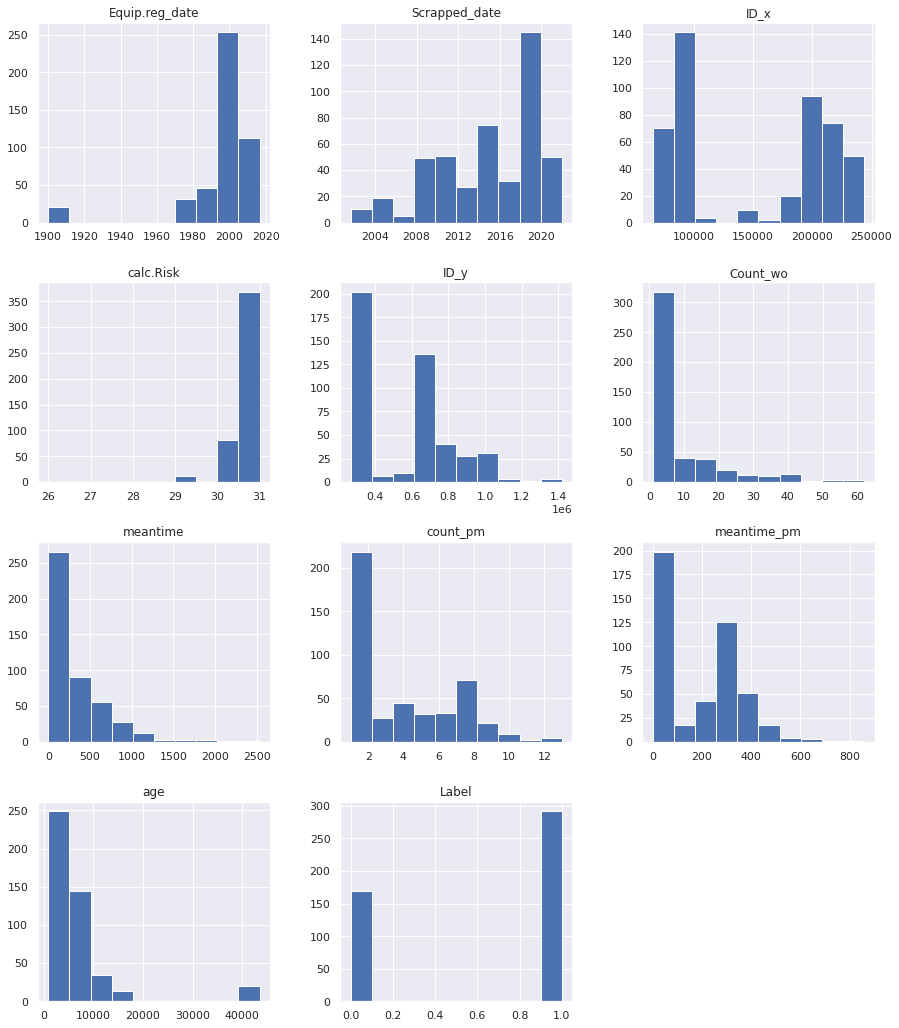

In [ ]:

testa3.hist(figsize=(15,18))

In [ ]:
testa3.describe()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age,Label
count,462.000000,462.000000,4.620000e+02,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,150499.145022,30.764069,5.714497e+05,8.722944,306.056277,3.803030,179.841991,7089.038961,0.632035
std,64642.067062,0.521311,2.565140e+05,11.887810,371.940635,2.992063,170.701421,8268.169084,0.482775
min,65639.000000,26.000000,2.659920e+05,1.000000,0.000000,1.000000,0.000000,910.000000,0.000000
25%,85327.500000,31.000000,3.171465e+05,1.000000,0.000000,1.000000,0.000000,3800.000000,0.000000
50%,173405.500000,31.000000,6.712195e+05,3.000000,189.000000,3.000000,209.000000,4738.000000,1.000000
75%,209546.500000,31.000000,7.118770e+05,12.000000,471.000000,6.000000,313.000000,6453.000000,1.000000
max,243763.000000,31.000000,1.418885e+06,62.000000,2535.000000,13.000000,859.000000,43492.000000,1.000000


In [ ]:
testa3.Label.value_counts()

1    292
0    170
Name: Label, dtype: int64

**average meantime between pm activities for anestesia devices is 179 which means 6 months **

average age based on the 50 percentiles 4738 days which is 13 years 

I need to put who ever is falling behind this average in different data frame and study what happens when the meantime between pm  goes 

In [ ]:
delayed=testa3.loc[testa3['meantime_pm'] >=179]

In [ ]:
delayed

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm,age,Label
77202,2003-01-01,2019-03-12,77202,Anestesiarbetsstation,Dräger,31.0,312978,2016-06-02,9,385,8,302,5914,0
77207,2003-01-01,2019-03-12,77207,Anestesiarbetsstation,Dräger,31.0,283000,2018-02-12,11,371,8,302,5914,0
77237,2003-01-01,2019-03-12,77237,Anestesiarbetsstation,Dräger,31.0,311329,2016-02-18,10,401,8,302,5914,0
77242,2003-01-01,2019-03-12,77242,Anestesiarbetsstation,Dräger,31.0,281706,2017-09-25,10,428,8,302,5914,0
77252,2003-01-01,2019-03-12,77252,Anestesiarbetsstation,Dräger,31.0,312914,2017-05-16,12,425,8,302,5914,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231337,1996-09-02,2015-03-20,231337,Lungventilator anestesi,Anmedic,31.0,873284,2010-04-15,4,1243,2,307,6773,0
231338,1996-09-02,2020-07-01,231338,Lungventilator anestesi,Anmedic,31.0,873285,2017-06-05,5,1516,3,352,8703,0
231339,1996-09-02,2019-02-19,231339,Lungventilator anestesi,Anmedic,31.0,873286,2009-04-20,5,922,6,461,8205,0
231344,1996-09-02,2015-06-17,231344,Lungventilator anestesi,Anmedic,30.0,873278,2015-06-17,10,686,2,536,6862,0


In [ ]:
delayed.corr()

,ID_x,calc.Risk,ID_y,Count_wo,meantime,count_pm,meantime_pm,age,Label
ID_x,1.000000,-0.482807,0.962000,0.445873,-0.144348,-0.004818,-0.092817,0.187234,0.218011
calc.Risk,-0.482807,1.000000,-0.423463,-0.507130,0.166285,-0.335468,-0.015311,-0.074157,-0.189454
ID_y,0.962000,-0.423463,1.000000,0.347593,-0.117543,-0.046950,-0.100906,0.268706,0.198447
Count_wo,0.445873,-0.507130,0.347593,1.000000,-0.283016,0.470679,0.040028,-0.090384,0.361962
meantime,-0.144348,0.166285,-0.117543,-0.283016,1.000000,-0.245638,0.109096,0.256662,-0.784350
count_pm,-0.004818,-0.335468,-0.046950,0.470679,-0.245638,1.000000,-0.079348,-0.155543,0.206519
meantime_pm,-0.092817,-0.015311,-0.100906,0.040028,0.109096,-0.079348,1.000000,-0.072217,-0.016570
age,0.187234,-0.074157,0.268706,-0.090384,0.256662,-0.155543,-0.072217,1.000000,-0.198130
Label,0.218011,-0.189454,0.198447,0.361962,-0.784350,0.206519,-0.016570,-0.198130,1.000000


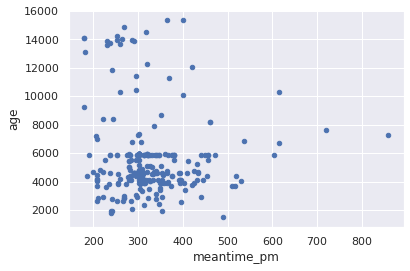

In [ ]:
delayed.plot(y='age',x='meantime_pm',kind='scatter')

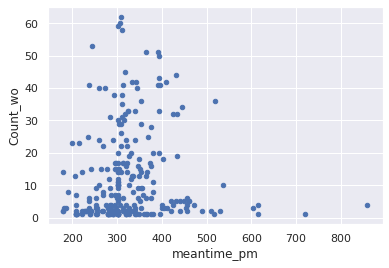

In [ ]:
delayed.plot(y='Count_wo',x='meantime_pm',kind='scatter')

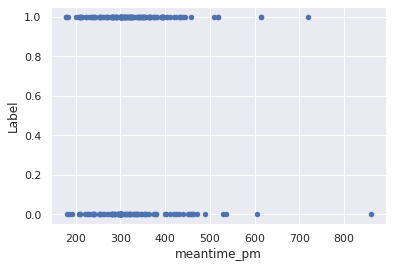

In [ ]:
delayed.plot(x='meantime_pm',y='Label',kind='scatter')

### **In-time and within range pm activities **

In [ ]:
in_time=testa3.loc[testa3['meantime_pm']<=179]

In [ ]:
in_time

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,calc.Risk,ID_y,last_wo,Count_wo,meantime,count_pm,meantime_pm,age,Label
68212,2000-01-01,2017-09-01,68212,Anestesiarbetsstation,Dräger,31.0,340376,2010-08-17,12,298,1,0,6453,1
68213,2000-01-01,2017-09-01,68213,Anestesiarbetsstation,Dräger,31.0,340389,2004-02-25,9,134,1,0,6453,1
82377,1998-01-01,2009-01-21,82377,Anestesiarbetsstation,GE Healthcare,31.0,288189,2008-09-22,18,173,1,0,4038,1
90834,2006-01-01,2009-10-15,90834,Anestesiarbetsstation,GE Healthcare,31.0,309451,2008-05-30,2,354,1,0,1383,0
100128,2009-01-01,2019-03-12,100128,Anestesiarbetsstation,Dräger,31.0,587931,2010-04-07,1,0,1,0,3722,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231334,1996-08-27,2015-01-21,231334,Lungventilator anestesi,Anmedic,31.0,873281,2011-08-15,5,1093,4,161,6721,0
231340,1996-09-02,2015-08-17,231340,Lungventilator anestesi,Anmedic,31.0,873287,2011-08-25,5,1094,1,0,6923,0
231342,1996-09-02,2015-08-17,231342,Lungventilator anestesi,Anmedic,31.0,873279,2007-12-11,2,2058,1,0,6923,0
231343,1996-09-02,2014-12-15,231343,Lungventilator anestesi,Anmedic,31.0,873280,2010-03-19,6,824,10,134,6678,0


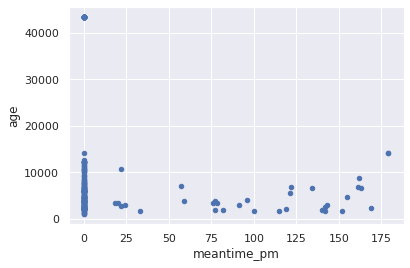

In [ ]:
in_time.plot(y='age',x='meantime_pm',kind='scatter')

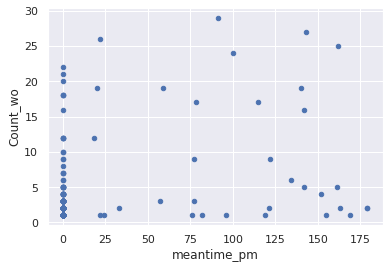

In [ ]:
in_time.plot(y='Count_wo',x='meantime_pm',kind='scatter')

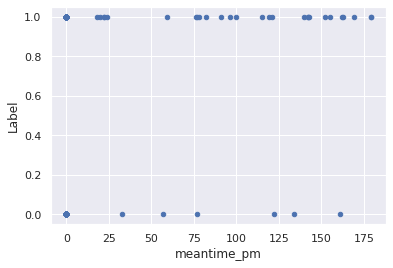

In [ ]:
in_time.plot(x='meantime_pm',y='Label',kind='scatter')

### **  Writing python function for processing data blocks**

# **Hospital 2 **

# **EQ2**

In [ ]:
initial=(r'/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital2/eq2.csv')

In [ ]:
data9=pd.read_csv(initial,sep=';',names=['InvNr',	'InkDat',	'Skrotad',	'flReplacementCost',	'flPurchaseCost',	'SkrotDatum',	'ID',	'PMLMaintenanceRequirementID',	'PMLMissionCriticalID',	'PMLRiscID',	'Benamn','Fabrikat',	'Modell','Handelsnamn','intRisktal',	'strRiscName',	'intRiscSeverityLevel',	'FUSenaste',	'FUIntNasta','PMLMaintenanceRequirementDescription','PMLMissionCriticalDescription',	'PMLRiscDescription'])

In [ ]:
data9.shape

(44249, 22)

In [ ]:
data9.head(4)

,InvNr,InkDat,Skrotad,flReplacementCost,flPurchaseCost,SkrotDatum,ID,PMLMaintenanceRequirementID,PMLMissionCriticalID,PMLRiscID,...,Modell,Handelsnamn,intRisktal,strRiscName,intRiscSeverityLevel,FUSenaste,FUIntNasta,PMLMaintenanceRequirementDescription,PMLMissionCriticalDescription,PMLRiscDescription
0,42732,2016-06-01 00:00:00.000,0.0,0,199900,NaN,32292.0,NaN,NaN,NaN,...,Masterclave 09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NULL,,,,"
1,23002,1998-07-29 00:00:00.000,1.0,0,80000,2015-04-23 00:00:00.000,25423.0,NaN,NaN,NaN,...,Masterclave 60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NULL,,,,"
2,23005,2008-09-11 00:00:00.000,1.0,0,197000,2015-04-23 00:00:00.000,25420.0,NaN,NaN,NaN,...,APS 300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NULL,,,,"
3,36220,2015-04-23 00:00:00.000,1.0,0,250001,2021-05-25 00:00:00.000,29159.0,NaN,NaN,NaN,...,APS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NULL,,,,"


# **pm**

In [ ]:
init3=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital2/pm.csv")

In [ ]:
data10=pd.read_csv(init3,sep=';',parse_dates=True)

In [ ]:
data10.head(3)

,1,22660,2009-05-01 00:00:00.000,NULL,12 Månader,1.1
0,2,132.0,2008-10-15 00:00:00.000,NaN,12 Månader,1
1,3,1342.0,2022-12-10 00:00:00.000,2021-12-10 00:00:00.000,12 Månader,1
2,4,2595.0,2022-12-10 00:00:00.000,2021-12-10 00:00:00.000,12 Månader,1


# **pm-hist**

In [ ]:
inithos_2=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital2/pm_hist.csv")

In [ ]:
pmhist_hosp2=pd.read_csv(inithos_2,sep=';',parse_dates=True)

In [ ]:
pmhist_hosp2.head(4)

,2009-08-21,4244,1,12,2,NULL,NULL.1,2.1,2009-08-21.1,NULL.2,22488,11766,0,1.1,0.1
0,2009-06-17,154,1,12.0,2.0,12.0,2.0,1,2009-06-17,NaN,3021,11770.0,0,1,0
1,2009-06-17,171,1,12.0,2.0,12.0,2.0,2,2009-06-17,NaN,22723,11780.0,0,1,0
2,2009-06-17,3724,1,12.0,2.0,12.0,2.0,1,2009-06-17,NaN,3019,11789.0,0,1,0
3,2009-06-23,184,1,12.0,2.0,NaN,NaN,1,2009-06-23,NaN,542,11795.0,0,1,0


# **Hospital7**

# **Eq7**

In [ ]:
data11=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital7/ks_inv.csv',sep=';',parse_dates=True)

In [ ]:
data11.head(3)

,98200,NULL,1,0,0.1,2009-09-22 00:00:00.000,6037,NULL.1,NULL.2,NULL.3,...,-.1,Unnamed: 13,NULL.4,NULL.5,NULL.6,2008-01-04 00:00:00.000,2009-01-04 00:00:00.000,NULL.7,NULL.8,NULL.9
0,98201,NaN,1,0.0,0,2010-02-03 00:00:00.000,6038,NaN,NaN,NaN,...,-,NaN,NaN,NaN,NaN,2009-02-09 00:00:00.000,2010-02-09 00:00:00.000,NaN,NaN,NaN
1,98202,NaN,1,0.0,0,2010-02-09 00:00:00.000,6039,NaN,NaN,NaN,...,-,NaN,NaN,NaN,NaN,2009-02-19 00:00:00.000,2010-02-19 00:00:00.000,NaN,NaN,NaN
2,98203,NaN,1,0.0,0,NaN,6040,NaN,NaN,NaN,...,-,NaN,NaN,NaN,NaN,2008-12-18 00:00:00.000,2009-12-18 00:00:00.000,NaN,NaN,NaN


# **Hospital 8**

# **EQ8**

In [ ]:
data12=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/hospital8/nu_inv.csv',sep=';')

In [ ]:
data12.head(3)

,90016,2001-01-05 00:00:00.000,1,0,0.1,NULL,552325,NULL.1,NULL.2,NULL.3,...,**Service**,NULL.4,NULL.5,NULL.6,NULL.7,NULL.8,NULL.9,NULL.10,NULL.11,NULL.12
0,90017,2001-01-05 00:00:00.000,1,0.0,0,2013-08-15 00:00:00.000,552326,NaN,NaN,NaN,...,**Service**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90018,2001-01-05 00:00:00.000,1,0.0,0,2010-03-10 00:00:00.000,552327,NaN,NaN,NaN,...,**Service**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90019,2001-01-05 00:00:00.000,1,0.0,0,NaN,552328,NaN,NaN,NaN,...,**Service**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data12.shape

(31173, 22)

# **pm**

In [ ]:
data13=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/hospital8/nu_pm.csv',sep=';')

In [ ]:
data13.shape

(18021, 6)

In [ ]:
data13.head(3)

,208024,551218,2017-06-27 00:00:00.000,2016-06-27 00:00:00.000,12 Månader,1
0,208025,551306.0,2010-08-26 00:00:00.000,NaN,12 Månader,1
1,208026,551318.0,NaN,2005-05-03 00:00:00.000,NaN,0
2,208027,551319.0,2004-12-02 00:00:00.000,2003-12-02 00:00:00.000,12 Månader,1


# **Hospital11**

### **EQ11**

In [ ]:
data14=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital11/SU_inv.csv',sep=';',parse_dates=True)

In [ ]:
data14.shape

(85024, 22)

In [ ]:
data14.columns=['InvNr','InkDat','Skrotad','flReplacementCost','flPurchaseCost','SkrotDatum','ID','PMLMaintenanceRequirementID','PMLMissionCriticalID','PMLRiscID','Benamn','Fabrikat','Modell','Handelsnamn','intRisktal','strRiscName','intRiscSeverityLevel','FUSenaste','FUIntNasta','PMLMaintenanceRequirementDescription','PMLMissionCriticalDescription','PMLRiscDescription']

In [ ]:
data14.head(3)

,InvNr,InkDat,Skrotad,flReplacementCost,flPurchaseCost,SkrotDatum,ID,PMLMaintenanceRequirementID,PMLMissionCriticalID,PMLRiscID,...,Modell,Handelsnamn,intRisktal,strRiscName,intRiscSeverityLevel,FUSenaste,FUIntNasta,PMLMaintenanceRequirementDescription,PMLMissionCriticalDescription,PMLRiscDescription
0,633179,NaN,1,NaN,NaN,2014-08-26 00:00:00.000,56404,NaN,NaN,NaN,...,Okänd modell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,633180,NaN,1,NaN,NaN,2014-08-26 00:00:00.000,56405,NaN,NaN,NaN,...,Okänd modell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,633181,NaN,1,NaN,NaN,2014-08-26 00:00:00.000,56406,NaN,NaN,NaN,...,Okänd modell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eq_hos11=data14.drop(columns=['intRiscSeverityLevel','Skrotad','flReplacementCost','flPurchaseCost','PMLMaintenanceRequirementID','PMLMissionCriticalID','PMLRiscID','strRiscName','Handelsnamn','PMLMaintenanceRequirementDescription','PMLMissionCriticalDescription','PMLRiscDescription','FUSenaste','FUIntNasta'])

In [ ]:
eq_hos11.head(3)

,InvNr,InkDat,SkrotDatum,ID,Benamn,Fabrikat,Modell,intRisktal
0,633179,NaN,2014-08-26 00:00:00.000,56404,Accelerometer,Okänt fabrikat,Okänd modell,NaN
1,633180,NaN,2014-08-26 00:00:00.000,56405,Accelerometer,Okänt fabrikat,Okänd modell,NaN
2,633181,NaN,2014-08-26 00:00:00.000,56406,Accelerometer,Okänt fabrikat,Okänd modell,NaN


In [ ]:
dict3 = {'FUSenaste': 'prevPm',
        'FUIntNasta': 'nexPm',
        'InkDat':'Equip.reg_date',
        'SkrotDatum':'Scrapped_date',
        'Benamn':'dev',
      'Fabrikat':'Brand',
        'Modell':'Model',
        'intRisktal':'calc.Risk'}

In [ ]:
eq_hos11.rename(columns=dict,inplace=True)

In [ ]:
eq_hos11

,InvNr,Equip.reg_date,Scrapped_date,ID,dev,Brand,Model,calc.Risk
0,633179,NaN,2014-08-26 00:00:00.000,56404,Accelerometer,Okänt fabrikat,Okänd modell,NaN
1,633180,NaN,2014-08-26 00:00:00.000,56405,Accelerometer,Okänt fabrikat,Okänd modell,NaN
2,633181,NaN,2014-08-26 00:00:00.000,56406,Accelerometer,Okänt fabrikat,Okänd modell,NaN
3,633182,NaN,2014-08-26 00:00:00.000,56407,Accelerometer,Okänt fabrikat,Okänd modell,NaN
4,633183,NaN,2014-08-26 00:00:00.000,56408,Accelerometer,Okänt fabrikat,Okänd modell,NaN
...,...,...,...,...,...,...,...,...
85019,NaN,2005-01-10 00:00:00.000,2012-09-27 00:00:00.000,44873,NaN,NaN,NaN,NaN
85020,NaN,2005-01-10 00:00:00.000,2012-10-12 00:00:00.000,44874,NaN,NaN,NaN,NaN
85021,NaN,2005-01-10 00:00:00.000,2013-01-15 00:00:00.000,44875,NaN,NaN,NaN,NaN
85022,NaN,2005-01-12 00:00:00.000,2012-10-12 00:00:00.000,44876,NaN,NaN,NaN,NaN


In [ ]:
eq_hos11.shape

(85024, 8)

In [ ]:
eq_hos11.isnull().sum()

InvNr               518
Equip.reg_date     6124
Scrapped_date     47962
ID                    0
dev                 568
Brand               568
Model               568
calc.Risk         84627
dtype: int64

we will try to fill in the calculate risk columns for the devices and for scarpped date with today date.

In [ ]:
#we need to convert dates into parsed ones and datetime object
eq_hos11['Equip.reg_date']=pd.to_datetime(eq_hos11['Equip.reg_date'])
eq_hos11['Scrapped_date']=pd.to_datetime(eq_hos11['Scrapped_date'])

adding scrapped_date to the july last date as this the time when we got htis data and scrapped date refers to in service functioning devices
12 july 2022

In [ ]:
eq_hos11['Scrapped_date'].fillna('2022-07-23',inplace=True)

In [ ]:
eq_hos11.isnull().sum()

InvNr               518
Equip.reg_date     6124
Scrapped_date         0
ID                    0
dev                 568
Brand               568
Model               568
calc.Risk         84627
dtype: int64

In [ ]:
eq_hos11['calc.Risk'].fillna('20',inplace=True)

In [ ]:
eq_hos11.isnull().sum()

InvNr              518
Equip.reg_date    6124
Scrapped_date        0
ID                   0
dev                568
Brand              568
Model              568
calc.Risk            0
dtype: int64

In [ ]:
eq_hos11.dropna(inplace=True)

In [ ]:
eq_hos11.shape

(78665, 8)

**pm_history**

In [ ]:
pm_hist=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital11/su_pm_hist.csv', sep=';')

In [ ]:
pm_hist.shape

(70949, 15)

In [ ]:
pm_hist.head(3)

,2011-04-04,10,0,NULL,NULL.1,NULL.2,NULL.3,NULL.4,2011-04-04.1,2011-04-04.2,19206,218962,1,1.1,0.1
0,2011-04-04,12,0,NaN,NaN,NaN,NaN,NaN,2011-04-04,2011-04-04,19488,218966,1,1,0
1,2011-04-04,11,0,NaN,NaN,NaN,NaN,NaN,2011-04-04,2011-04-04,14622,218964,1,1,0
2,2011-04-04,13,0,NaN,NaN,NaN,NaN,NaN,2011-04-04,2011-04-04,19286,218977,1,1,0


### **pm**

In [ ]:
pm=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital11/su_pm.csv',sep=';')

In [ ]:
pm.shape

(26345, 6)

In [ ]:
pm.head(3)

,26,46118,2020-02-19 00:00:00.000,2019-02-19 00:00:00.000,12 Månader,1
0,27,46119.0,2019-11-13 00:00:00.000,2018-11-13 00:00:00.000,12 Månader,1
1,28,46120.0,2022-01-25 00:00:00.000,2021-01-25 00:00:00.000,12 Månader,1
2,30,46121.0,2022-09-30 00:00:00.000,2021-09-30 00:00:00.000,12 Månader,1


In [ ]:
pm.columns=['Id','EquipmentId','NextPM','LastPM','Interval','IsRecurring']

**pm-overdue**

In [ ]:
pm_over=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital11/su_pm_overdue.csv',sep=';')

In [ ]:
pm_over.shape

(21339, 4)

In [ ]:
pm_over.head(3)

,28387,8,0,0.1
0,31304,2,0,0
1,46956,5,0,0
2,19897,4,0,0


### **pmdata**

In [ ]:
pmdata=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital11/su_pmdata.csv',sep=';',names=['invID','last_pm','first_pm','count_pm','meantime_pm'])

In [ ]:
pmdata.shape

(21340, 5)

In [ ]:
pmdata.head(4)

,invID,last_pm,first_pm,count_pm,meantime_pm
0,28387,2020-12-29,2012-06-28,8,388
1,31304,2012-11-09,2011-12-19,2,163
2,46956,2021-01-22,2012-11-16,5,597
3,19897,2015-05-21,2012-09-27,4,241


In [ ]:
pmdata.isnull().sum()

pmdata.set_index('invID',drop=False,inplace=True)

pmdata.head(3)

,invID,last_pm,first_pm,count_pm,meantime_pm
invID,,,,,
28387,28387,2020-12-29,2012-06-28,8,388
31304,31304,2012-11-09,2011-12-19,2,163
46956,46956,2021-01-22,2012-11-16,5,597


# **PM-His7**

***glossary for PM-his7 data : ***

[blnRecurring] LW: Is scheduled as recurring. Meaning it after the PM is completed, another PM session will be scheduled.
      ,[intTimeInterval] LW: The period between the recurring schedules. Related to if bInRecurring is true.
      ,[PM_TimeIntervalUnitID] LW: The unit type of the period between the recurring schedules i.e. days, months. bInRecurring is true.
      ,[intTimeIntervalRecommended] LW: Is this data populated? It’s the same as [PM_TimeInterval] but what is recommend by the manufacturer.
      ,[PM_TimeIntervalUnitIDRecommended] LW: Is this data populated? It’s the same as [PM_TimeIntervalUnitID] but what is recommend by the manufacturer.
      ,[intEstimatedPMTimeHours] LW: Estimation of how long the PM will take to perform
      ,convert(date,[datLatest]) LW: Latest performed PM.
      ,convert(date,[datNext]) LW: The upcoming PM to be performed.
      ,[InventarierID] LW: Equipment ID
      ,workorderid AS [ArborderID] LW: Work Order ID
      ,[blnHiddenPMClock] LW: Not sure, could you give examples of how the data looks?
      ,[DeviatingTimeIntervalRecommended] LW: Is this data populated?
        ,DATEDIFF(DD,[datLatest],[datCreated]) AS PM_diff LW: The number of days between when the PM should have been performed and when it was performed.

In [ ]:
df15=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital11/su_pm_hist.csv")

In [ ]:
 data15= pd.read_csv(df15,sep=';',header=0)

In [ ]:
data15

,2011-04-04,10,0,NULL,NULL.1,NULL.2,NULL.3,NULL.4,2011-04-04.1,2011-04-04.2,19206,218962,1,1.1,0.1
0,2011-04-04,12,0,NaN,NaN,NaN,NaN,NaN,2011-04-04,2011-04-04,19488,218966,1,1,0
1,2011-04-04,11,0,NaN,NaN,NaN,NaN,NaN,2011-04-04,2011-04-04,14622,218964,1,1,0
2,2011-04-04,13,0,NaN,NaN,NaN,NaN,NaN,2011-04-04,2011-04-04,19286,218977,1,1,0
3,2011-04-05,15,0,NaN,NaN,NaN,NaN,NaN,2011-04-05,2011-04-05,30024,218990,1,1,0
4,2011-04-05,23,0,NaN,NaN,NaN,NaN,NaN,2011-04-05,2011-04-05,30440,219025,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70944,2022-07-01,20441,1,24.0,2.0,NaN,NaN,NaN,2022-07-01,2022-07-03,60689,434125,0,0,0
70945,2022-07-01,47984,1,36.0,2.0,NaN,NaN,NaN,2022-07-01,2022-11-01,73940,434044,0,0,0
70946,2022-07-01,28883,1,12.0,2.0,NaN,NaN,NaN,2022-07-01,2022-06-07,65328,434128,0,0,0
70947,2022-07-01,50509,1,24.0,2.0,NaN,NaN,NaN,2022-07-01,2022-06-02,61781,434129,0,0,0


In [ ]:
data8.isnull().sum()

(No column name)                    0
ID                                  0
blnRecurring                        0
intTimeInterval                     0
PM_TimeIntervalUnitID               0
intTimeIntervalRecommended          0
PM_TimeIntervalUnitIDRecommended    0
intEstimatedPMTimeHours             0
(No column name).1                  0
(No column name).2                  0
ArborderID                          0
blnHiddenPMClock                    0
DeviatingTimeIntervalRecommended    0
PM_diff                             0
dtype: int64

In [ ]:
#dict = {'FUSenaste': 'prevPm',
       # 'FUIntNasta': 'nexPm',
        #'InkDat':'Equip.reg_date',
        #'SkrotDatum':'Scrapped_date',
        #'Benamn':'dev',
      #'Fabrikat':'Brand',
        #'Modell':'Model',
        #'intRisktal':'calc.Risk'}

In [ ]:
#fin.rename(columns=dict,inplace=True)

In [ ]:
len(data8)

10112

In [ ]:
data8.dropna(inplace=True)

In [ ]:
data8.shape

(10112, 14)

In [ ]:
data8

,(No column name),ID,blnRecurring,intTimeInterval,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
InventarierID,,,,,,,,,,,,,,
150152,2018-01-17,83275,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-16,816359.0,0.0,0,0
150150,2018-01-17,83273,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-18,816367.0,0.0,0,0
152970,2018-01-15,87846,1,24.0,2.0,24.0,2.0,"2,5",2018-01-15,2018-06-02,684821.0,0.0,0,0
145683,2018-01-16,73705,1,12.0,2.0,12.0,2.0,4,2018-01-16,2017-07-19,816120.0,0.0,0,0
150154,2018-01-17,83277,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-16,816361.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207197,2020-08-25,125680,1,24.0,2.0,24.0,2.0,2,2020-08-25,2020-12-04,1322230.0,0.0,0,0
100411,2020-08-25,46732,1,12.0,2.0,12.0,2.0,1,2020-08-25,2020-06-12,1322248.0,0.0,0,0
256375,2020-08-26,160603,1,24.0,2.0,24.0,2.0,2,2020-08-26,2020-04-17,1322392.0,0.0,0,0


In [ ]:
data8.set_index('InventarierID',inplace=True)

KeyError: ignored

In [ ]:
data8.head(3)

In [ ]:
all_pm_fields= pd.merge(eq,data8,left_index=True, right_index=True)

In [ ]:
all_pm_fields.head(5)

In [ ]:
all_pm_fields.shape

### **wo**

In [ ]:
data16=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital11/su_wo.csv',sep=';',names=['ID','issued','Completed','fin_com','InventarieID'])

In [ ]:
data16.head(3)

In [ ]:
data16.isnull().sum()

In [ ]:
data16.set_index('InventarieID',inplace=True,drop=False)

In [ ]:
data16.head(3)

In [ ]:
data16.shape

### **wodata**

In [ ]:
wodata=pd.read_csv('/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospital11/su_wodata.csv',sep=';',names=['inventarieID','last_wo','first_wo','Count_wo','meantime'])

In [ ]:
wodata.head(3)

In [ ]:
wodata.shape

In [ ]:
wodata.set_index('inventarieID',inplace=True,drop=False)

In [ ]:
wodata.head(3)

# **Connecting columns together**

In [ ]:
inner_merged_total_WO1 = pd.merge(wodata,data16,left_index=True, right_index=True)

In [ ]:
inner_merged_total_WO1.shape

In [ ]:
inner_merged_total_WO1.head(5)

In [ ]:
test12=inner_merged_total_WO1.query("inventarieID==2.0")
test12

In [ ]:
inner_merged_total_WO1.count()

# **Connecting pm data with wo data**

In [ ]:
inner_mergeWO_pm2 = pd.merge(inner_merged_total_WO1,pmdata,left_index=True, right_index=True)

In [ ]:
inner_mergeWO_pm2.head(5)

# **Connecting all data together**

In [ ]:
eq_hos11.set_index('ID',drop=False,inplace=True)

In [ ]:
eq_hos11.head(3)

In [ ]:
all_data_together11= pd.merge(eq_hos11,inner_mergeWO_pm2,left_index=True, right_index=True)

In [ ]:
all_data_together11.head(5)

In [ ]:
all_data_together11=all_data_together11.drop(columns=['InvNr','issued','Completed','InventarieID','first_wo','invID'])

In [ ]:
all_data_together11.shape

# **pre-processing all data ** 

In [ ]:
all_data_together11.shape

In [ ]:
all_data_together11.count()

In [ ]:
all_data_together11.drop(columns=['Model','first_pm','last_pm','inventarieID'],inplace=True)

In [ ]:
all_data_together11.head(3)

**change equipment register dates outliers by creating new age column then see outliers within the age** but then this will not be an accurate approach

In [ ]:
all_data_together11.describe()

In [ ]:
all_data_together11['Equip.reg_date']=pd.to_datetime(all_data_together11['Equip.reg_date'])
all_data_together11['Scrapped_date']=pd.to_datetime(all_data_together11['Scrapped_date'])

In [ ]:
all_data_together11.head(3)

In [ ]:
all_data_together11.plot(x='Equip.reg_date',y='ID_x',kind='scatter',title='different equipment installation date over years against equipment ID')

In [ ]:
no_outlier11=all_data_together11.loc[all_data_together11['Equip.reg_date']>='1990-01-01']

In [ ]:
no_outlier.shape

In [ ]:
yes_outlier11=all_data_together11.loc[all_data_together11['Equip.reg_date']<='1990-01-01']

In [ ]:
yes_outlier11

In [ ]:
no_outlier11.drop_duplicates(subset='ID_x',keep='last',inplace=True)

In [ ]:
no_outlier11.shape

# **OXYGEN CONCENTRATORS**

In [ ]:
all_data_together11_oxygen=no_outlier11.query("dev == 'Oxygenkoncentrator stationär'")


In [ ]:
all_data_together11_oxygen.shape

# **anathesia device**

In [ ]:
data2=all_data_together11.query("dev == 'Anestesiarbetsstation'")
data3=all_data_together11.query("dev == 'Modul till anestesiarbetsstation'")
data4=all_data_together11.query("dev == 'Anestesimedelsförgasare, isofluran'")
data5=all_data_together11.query("dev == 'Anestesimedel Förgasare'")
data6=all_data_together11.query("dev == 'Anestesiapparat mobil'")
data7=all_data_together11.query("dev == 'Lungventilator anestesi'")
data_anes11 = pd.concat([data2, data3, data4, data5, data6, data7], axis=0)
data_anes11.head(3)

In [ ]:
data_anes11.shape

In [ ]:
#take out duplicatestesta2=all_data_together_pamonitor.drop_duplicates(subset='ID_x')

testa11=data_anes11.drop_duplicates(subset='ID_x',keep='last')

In [ ]:
testa11.shape

In [ ]:
testa11['Equip.reg_date']=pd.to_datetime(testa11['Equip.reg_date'])

In [ ]:
testa11['Scrapped_date']=pd.to_datetime(testa11['Scrapped_date'])

In [ ]:
testa11.head(3)

In [ ]:
testa11["age"]=(testa11["Scrapped_date"]-testa11["Equip.reg_date"]).dt.days


In [ ]:
testa11.head(4)

In [ ]:
testa11.info()

In [ ]:
testa11.describe()

In [ ]:
testa11.corr()

In [ ]:
testa11["Label"]=np.where(testa11['meantime']>=380,0,1)
#0 means there is no problem with the device
#1 means there is  a problem with the device


In [ ]:
testa11['Label'].value_counts()

In [ ]:
 Y_anes11=testa11["Label"].copy()


In [ ]:
Y_anes11.head(3)

In [ ]:
testa11.drop(columns=['dev','Brand','last_wo','Equip.reg_date','Scrapped_date','ID_y','ID_x','fin_com'])

In [ ]:
X02_11=testa11.drop(columns=['Label','dev','Equip.reg_date','Scrapped_date','Brand','last_wo','meantime'])
Y02_11=Y_anes11

In [ ]:
X02_11.drop(columns=['ID_x','fin_com','ID_y'],inplace=True)

In [ ]:
X_train02_anes11, X_test02_anes11, y_train02_anes11, y_test02_anes11 = train_test_split( 
          X02_11, Y02_11, test_size = 0.3, random_state = 100)

In [ ]:
y_train02_anes11.head(5)

In [ ]:
clf_gini_ana11 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)


In [ ]:
X_train02_anes11.head(3)

In [ ]:
History02_anes11=clf_gini_ana11.fit(X_train02_anes11, y_train02_anes11)

In [ ]:
y_pred02_anes11 = History02_anes11.predict(X_test02_anes11)
print("Predicted values:")
print(y_pred02_anes11)

In [ ]:
cm02_anes11 = confusion_matrix(y_test02_anes11, y_pred02_anes11)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm02_anes11)
disp.plot(cmap=plt.cm.Blues)
plt.gcf().set_size_inches(8,15)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()